In [1]:
import ensemble
import os
import dataset_generator as dataset
from ocr_ensamble_builder import ocr_cnn_ensamble_builder
from util import Util
from preprocessing import preprocess_data
import time
import numpy as np

Using TensorFlow backend.


In [2]:
# Generating the nets for each character in dataset
u = Util()

directories = []

for letter in dataset.ALPHABET_ALL:
    directories.append(os.path.join("checkpoints", letter))

for mydir in directories:
    if not os.path.exists(mydir):
        os.makedirs(mydir)

In [3]:
def analyze_all_letters(pos_neg_ratio=1):

    for index, my_dir in enumerate(directories):
        
        # Build the ensemble
        my_ensemble = ocr_cnn_ensamble_builder(2, 800, path=my_dir)

        # Get the train and test data
        curr_char = directories[index].split('\\')[1]

        (X_train, y_train, X_test, y_test) = dataset.generate_positive_and_negative_labeled(curr_char, pos_neg_ratio=pos_neg_ratio)

        print("\n---- START ANALISYS FOR CHAR %s ----" %(curr_char.upper()))

        ctime=time.time()

        print("\nStart TRAINING for char %s" %(curr_char.upper()))
        
        # Train the model for the letter if it is nedeed, otherwise compile the existent model
        if index > 2:
            # Train the data
            my_ensemble.fit(X_train, y_train, X_test, y_test, verbose=0)

            print("\nThe TRAINING lasted %.2f seconds" %(time.time()-ctime))  

        else:
            # Uncomment if you already trained the model, and comment the instruction above
            my_ensemble.compile_model()

        # Plot the history of the first ensemble's net
        my_ensemble._models[0].plot_history()

        # Evaluate the model
        score = my_ensemble.evaluate(X_test, y_test, verbose=1)

        predicted_classes = my_ensemble.predict(X_test)

        # Check which items we got right / wrong
        correct_indices = np.nonzero(predicted_classes == y_test)[0]
        incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

        X_test_prep, y_test_prep, _ = preprocess_data(X_test, y_test, 2, img_rows=34, img_cols=56, verbose=0)

        # Plot the examples of correct predictions
        print("\nExample of correct predictions for char: %s" %(curr_char.upper()))
        
        u.plot_images(X_test_prep[correct_indices[:9]], y_test_prep[correct_indices[:9]], 
                  predicted_classes[correct_indices[:9]], img_shape=(56,34))

        # Plot the examples of incorrect predictions
        print("\nExample of incorrect predictions for char: %s" %(curr_char.upper()))

        u.plot_images(X_test_prep[incorrect_indices[:9]], y_test_prep[incorrect_indices[:9]], 
                  predicted_classes[incorrect_indices[:9]], img_shape=(56,34))

        #Plot the confusion matrix
        u.plot_confusion_matrix(y_test, 2, predicted_classes)

        print("\n---- END ANALISYS FOR CHAR %s\n ----" %(curr_char.upper()))
    
    
    
    

Trovati 1638 esempi positivi per il carattere A .
Campioni di training: 1404 	Campioni di test: 234
Richiesti 1638 esempi negativi: trovati 1638 generici.
Numero totale di campioni di training: 2808
Numero totale di campioni di test: 468

---- START ANALISYS FOR CHAR A ----

Start TRAINING for char A
You need to train the model first!
X shape: (468, 34, 56, 1)
468 samples
Evaluating ensemble
468/468 [==============================] - 0s     
Test accuracy: 94.0170939661 %
Test error: 5.98290603385 %
468/468 [==============================] - 0s     

Example of correct predictions for char: A


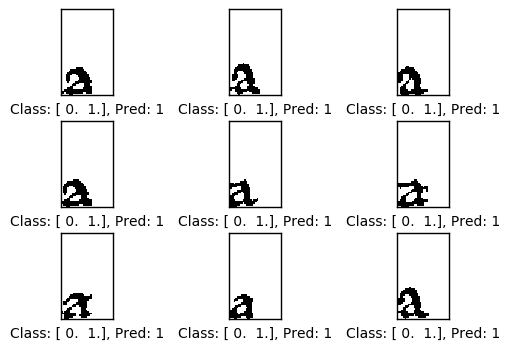


Example of incorrect predictions for char: A


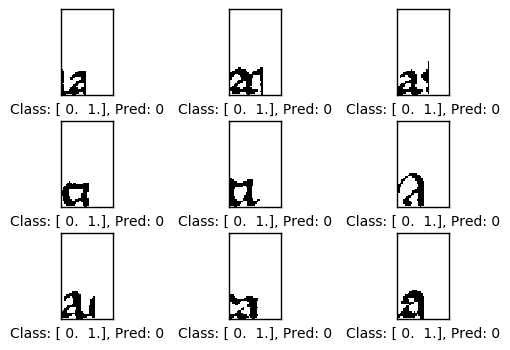

[[216  18]
 [ 10 224]]


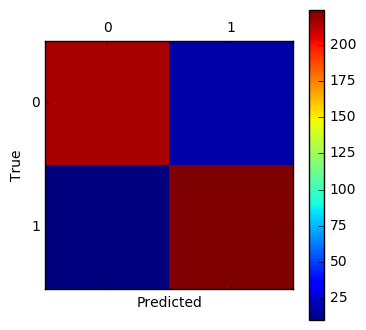


---- END ANALISYS FOR CHAR A
 ----
Trovati 655 esempi positivi per il carattere C .
Campioni di training: 561 	Campioni di test: 94
Richiesti 655 esempi negativi: trovati 655 generici.
Numero totale di campioni di training: 1122
Numero totale di campioni di test: 188

---- START ANALISYS FOR CHAR C ----

Start TRAINING for char C
You need to train the model first!
X shape: (188, 34, 56, 1)
188 samples
Evaluating ensemble
188/188 [==============================] - 0s     
Test accuracy: 93.6170217839 %
Test error: 6.38297910386 %
188/188 [==============================] - 0s     

Example of correct predictions for char: C


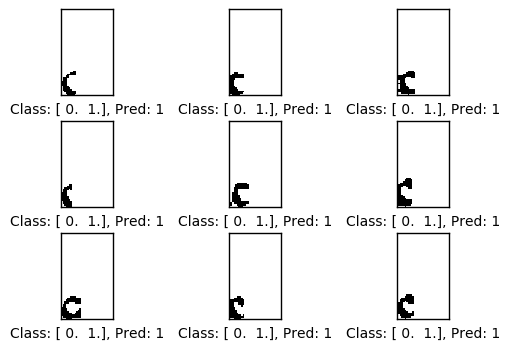


Example of incorrect predictions for char: C


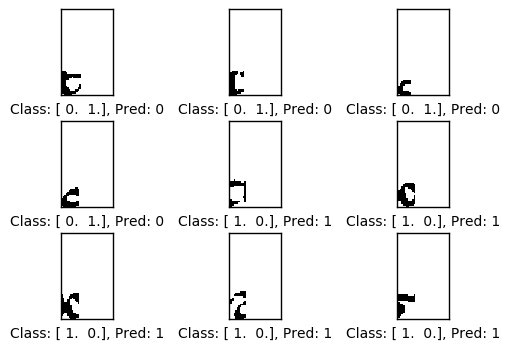

[[86  8]
 [ 4 90]]


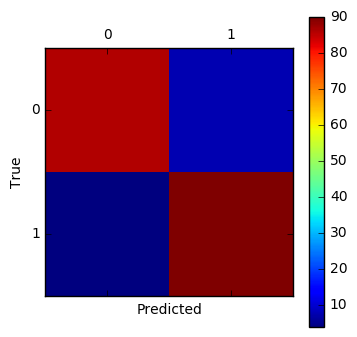


---- END ANALISYS FOR CHAR C
 ----
Trovati 406 esempi positivi per il carattere D_MEDIANA .
Campioni di training: 348 	Campioni di test: 58
Richiesti 406 esempi negativi: trovati 406 generici.
Numero totale di campioni di training: 696
Numero totale di campioni di test: 116

---- START ANALISYS FOR CHAR D_MEDIANA ----

Start TRAINING for char D_MEDIANA
You need to train the model first!
X shape: (116, 34, 56, 1)
116 samples
Evaluating ensemble
 96/116 [=======================>......] - ETA: 0sTest accuracy: 97.4137928979 %
Test error: 2.58620710208 %
 96/116 [=======================>......] - ETA: 0s
Example of correct predictions for char: D_MEDIANA


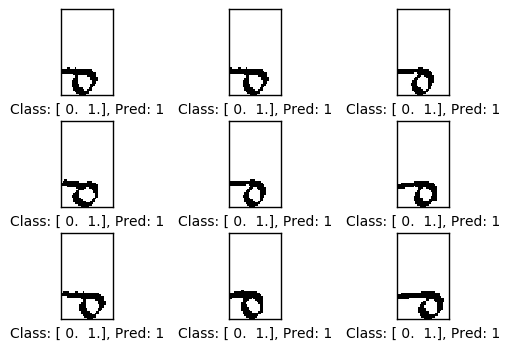


Example of incorrect predictions for char: D_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[55  3]
 [ 0 58]]


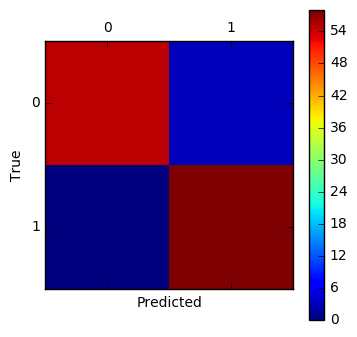


---- END ANALISYS FOR CHAR D_MEDIANA
 ----
Trovati 2827 esempi positivi per il carattere E .
Campioni di training: 2423 	Campioni di test: 404
Richiesti 2827 esempi negativi: trovati 2827 generici.
Numero totale di campioni di training: 4846
Numero totale di campioni di test: 808

---- START ANALISYS FOR CHAR E ----

Start TRAINING for char E
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 49 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 44 epoch(s)
Done.



The TRAINING lasted 3716.15 seconds
History: 


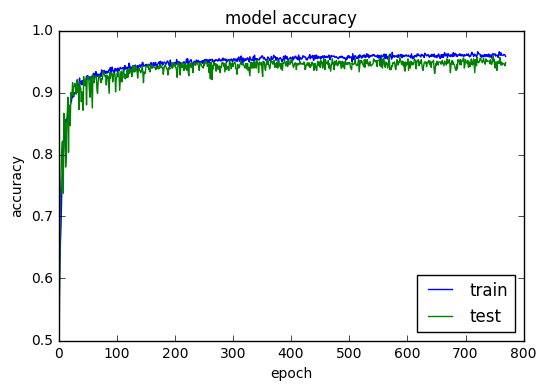

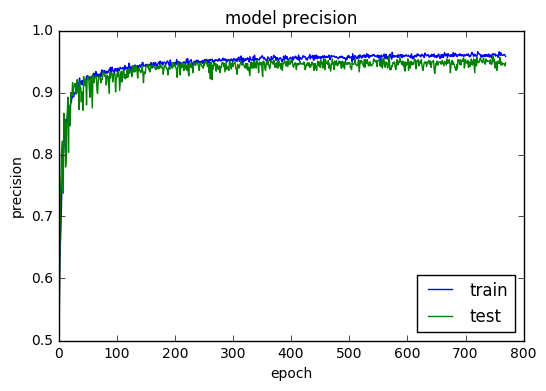

Continuation of training with no pre-processing:


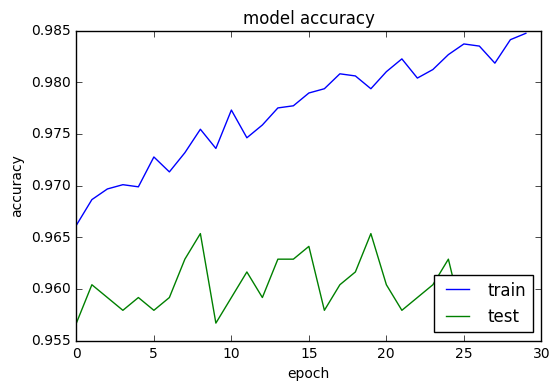

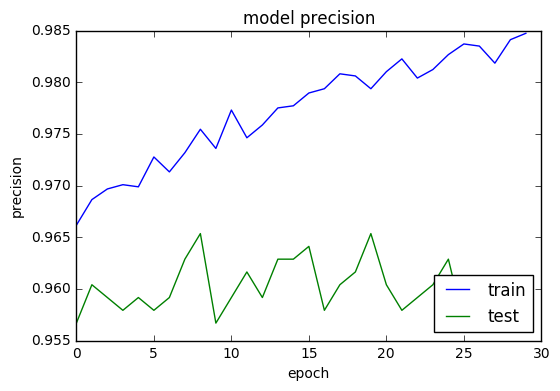

X shape: (808, 34, 56, 1)
808 samples
Evaluating ensemble
808/808 [==============================] - 0s     
Test accuracy: 96.2871287129 %
Test error: 3.71287128713 %
800/808 [============================>.] - ETA: 0s
Example of correct predictions for char: E


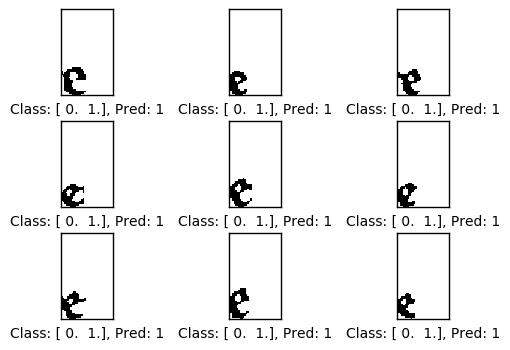


Example of incorrect predictions for char: E


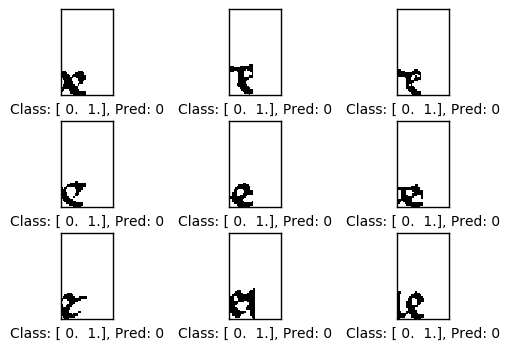

[[386  18]
 [ 12 392]]


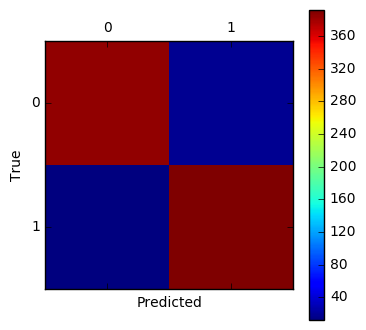


---- END ANALISYS FOR CHAR E
 ----
Trovati 798 esempi positivi per il carattere I .
Campioni di training: 684 	Campioni di test: 114
Richiesti 798 esempi negativi: trovati 798 generici.
Numero totale di campioni di training: 1368
Numero totale di campioni di test: 228

---- START ANALISYS FOR CHAR I ----

Start TRAINING for char I
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Done.



The TRAINING lasted 1088.19 seconds
History: 


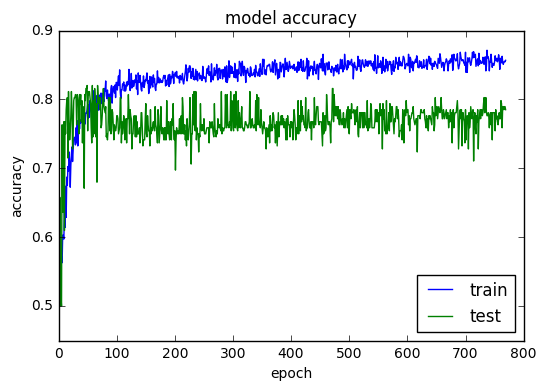

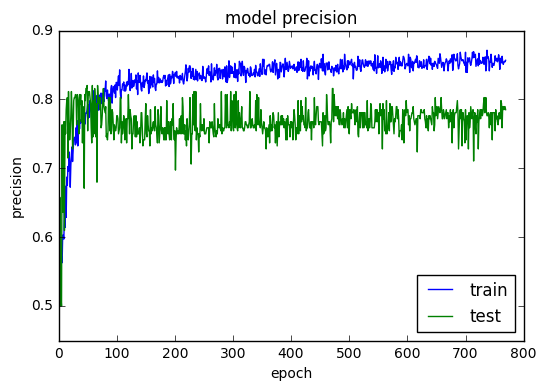

Continuation of training with no pre-processing:


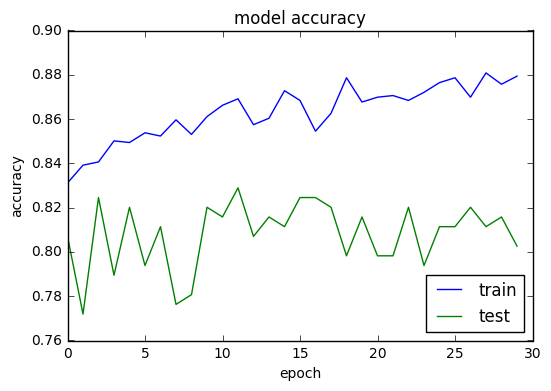

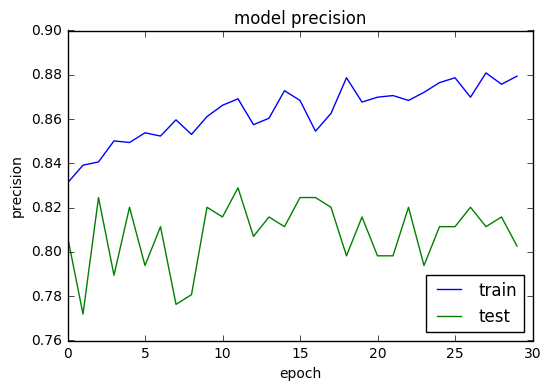

X shape: (228, 34, 56, 1)
228 samples
Evaluating ensemble
228/228 [==============================] - 0s     
Test accuracy: 82.4561403509 %
Test error: 17.5438596491 %
224/228 [============================>.] - ETA: 0s
Example of correct predictions for char: I


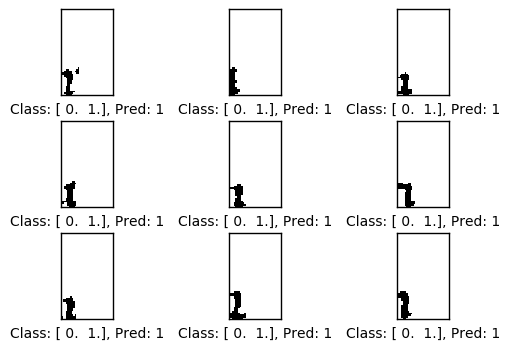


Example of incorrect predictions for char: I


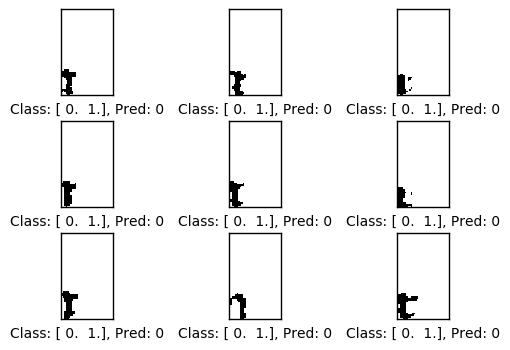

[[ 83  31]
 [  9 105]]


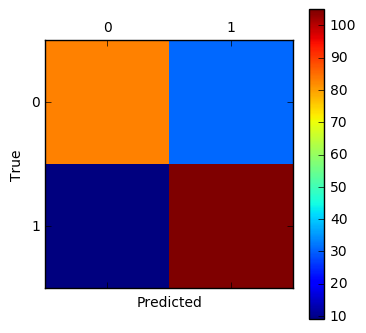


---- END ANALISYS FOR CHAR I
 ----
Trovati 1514 esempi positivi per il carattere M .
Campioni di training: 1297 	Campioni di test: 217
Richiesti 1514 esempi negativi: trovati 1514 generici.
Numero totale di campioni di training: 2594
Numero totale di campioni di test: 434

---- START ANALISYS FOR CHAR M ----

Start TRAINING for char M
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 28 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Done.



The TRAINING lasted 2166.51 seconds
History: 


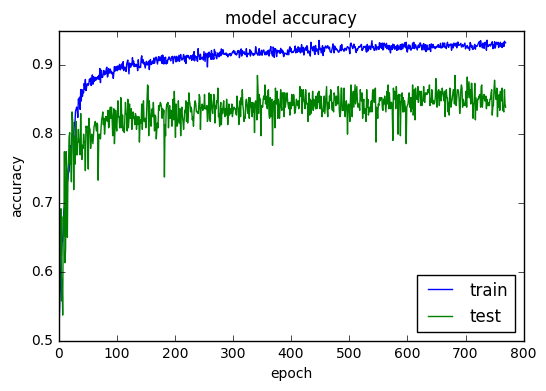

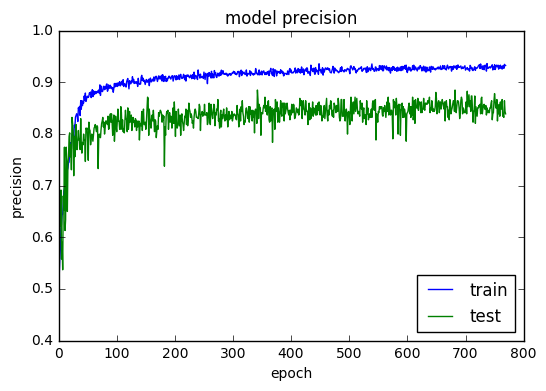

Continuation of training with no pre-processing:


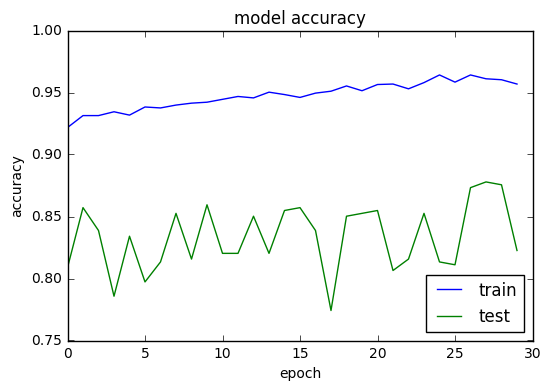

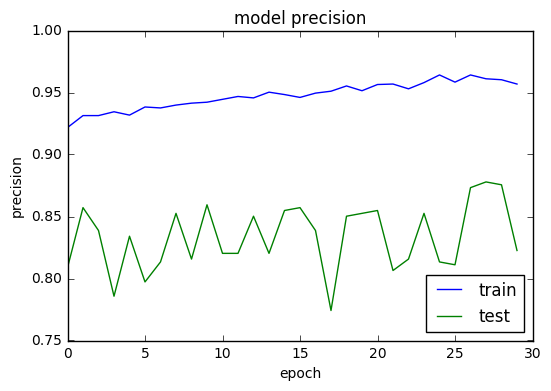

X shape: (434, 34, 56, 1)
434 samples
Evaluating ensemble
434/434 [==============================] - 0s     
Test accuracy: 88.7096773095 %
Test error: 11.2903226905 %
416/434 [===========================>..] - ETA: 0s
Example of correct predictions for char: M


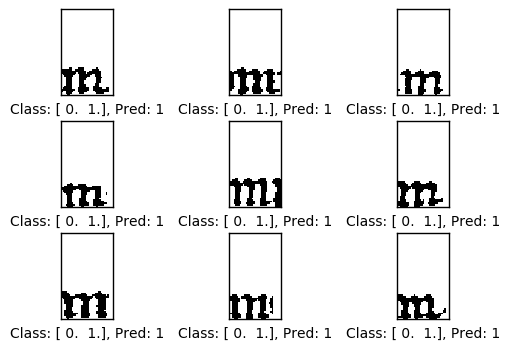


Example of incorrect predictions for char: M


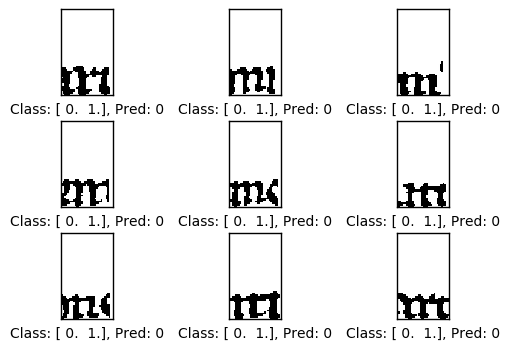

[[189  28]
 [ 21 196]]


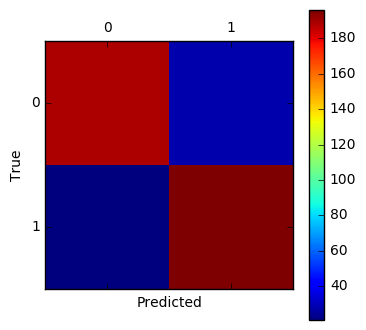


---- END ANALISYS FOR CHAR M
 ----
Trovati 1950 esempi positivi per il carattere N .
Campioni di training: 1671 	Campioni di test: 279
Richiesti 1950 esempi negativi: trovati 1950 generici.
Numero totale di campioni di training: 3342
Numero totale di campioni di test: 558

---- START ANALISYS FOR CHAR N ----

Start TRAINING for char N
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 40 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 36 epoch(s)
Done.



The TRAINING lasted 2643.31 seconds
History: 


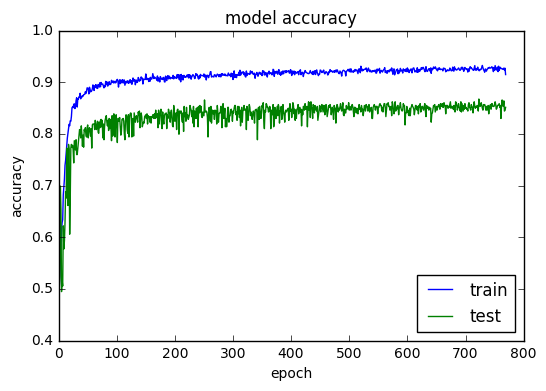

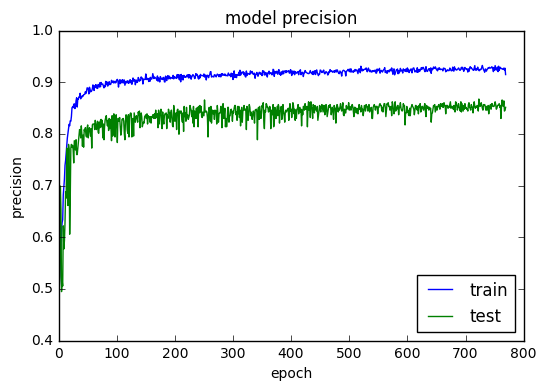

Continuation of training with no pre-processing:


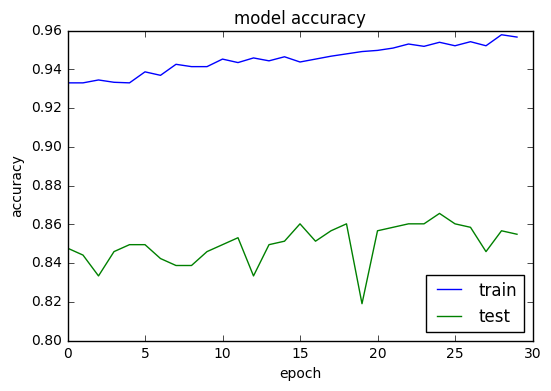

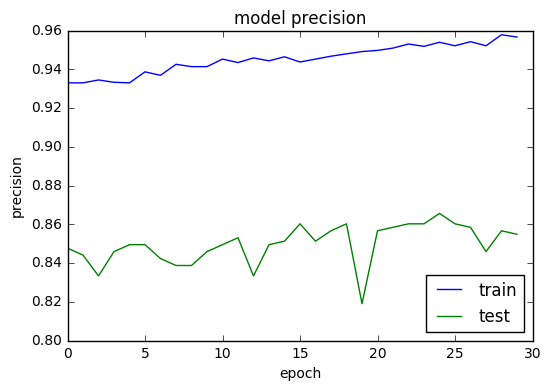

X shape: (558, 34, 56, 1)
558 samples
Evaluating ensemble
558/558 [==============================] - 0s     
Test accuracy: 86.3799284863 %
Test error: 13.6200716632 %
544/558 [============================>.] - ETA: 0s
Example of correct predictions for char: N


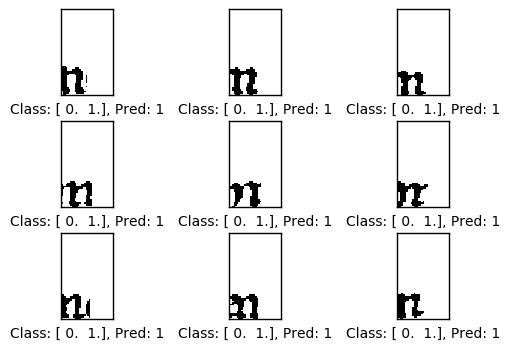


Example of incorrect predictions for char: N


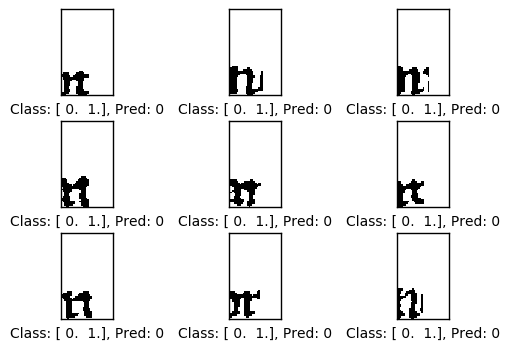

[[231  48]
 [ 28 251]]


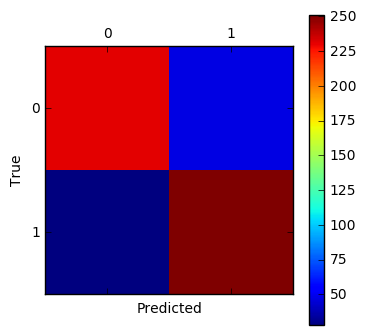


---- END ANALISYS FOR CHAR N
 ----
Trovati 711 esempi positivi per il carattere O .
Campioni di training: 609 	Campioni di test: 102
Richiesti 711 esempi negativi: trovati 711 generici.
Numero totale di campioni di training: 1218
Numero totale di campioni di test: 204

---- START ANALISYS FOR CHAR O ----

Start TRAINING for char O
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 17 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 10 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 14 epoch(s)
Done.



The TRAINING lasted 929.62 seconds
History: 


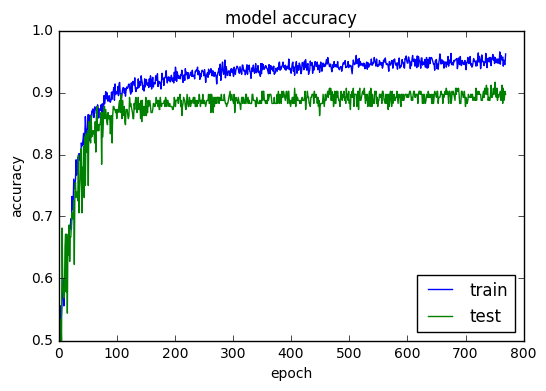

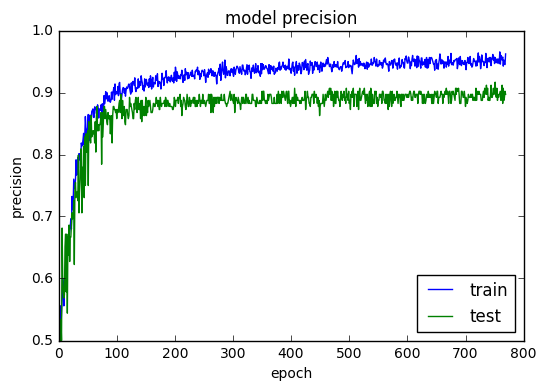

Continuation of training with no pre-processing:


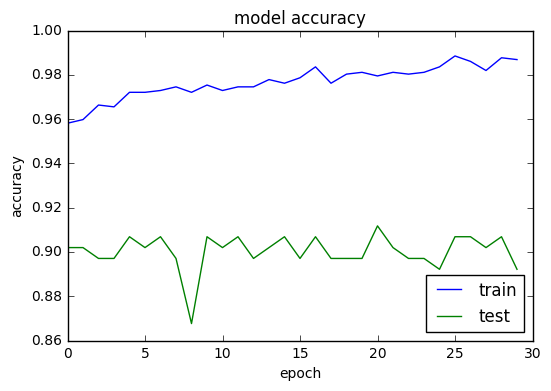

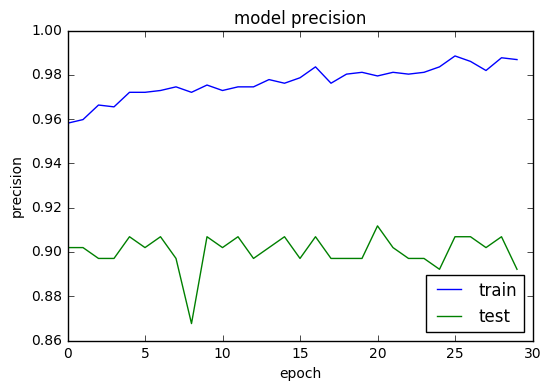

X shape: (204, 34, 56, 1)
204 samples
Evaluating ensemble
204/204 [==============================] - 0s     
Test accuracy: 89.7058825867 %
Test error: 10.2941177639 %
192/204 [===========================>..] - ETA: 0s
Example of correct predictions for char: O


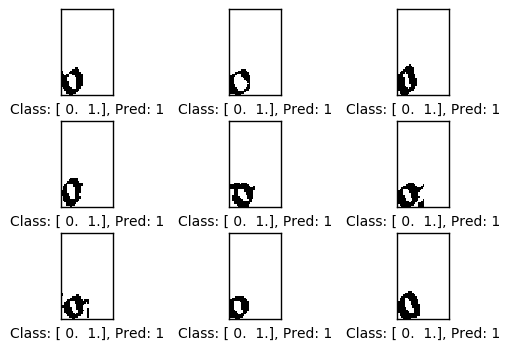


Example of incorrect predictions for char: O


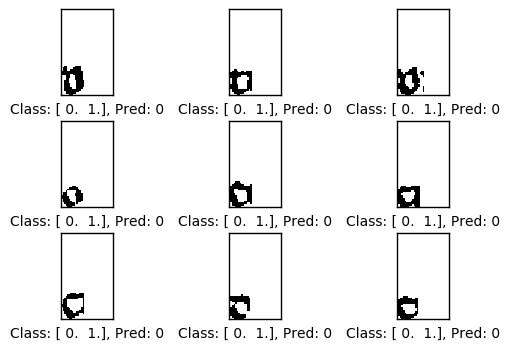

[[90 12]
 [ 9 93]]


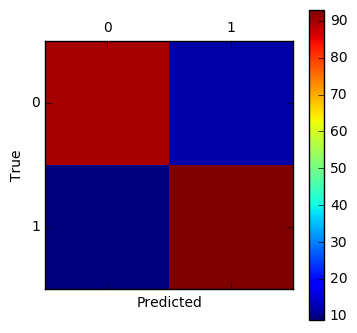


---- END ANALISYS FOR CHAR O
 ----
Trovati 309 esempi positivi per il carattere R .
Campioni di training: 264 	Campioni di test: 45
Richiesti 309 esempi negativi: trovati 309 generici.
Numero totale di campioni di training: 528
Numero totale di campioni di test: 90

---- START ANALISYS FOR CHAR R ----

Start TRAINING for char R
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 42 epoch(s)
Done.



The TRAINING lasted 445.25 seconds
History: 


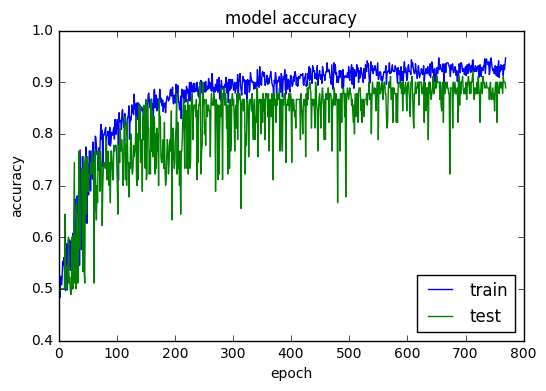

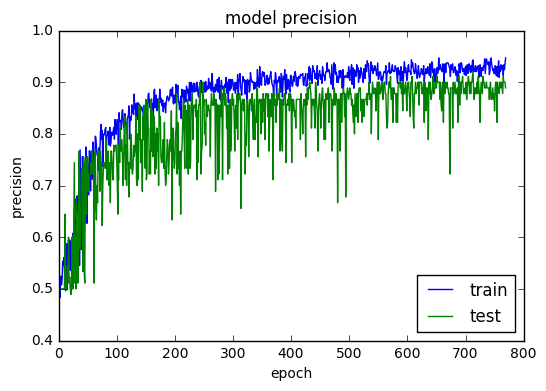

Continuation of training with no pre-processing:


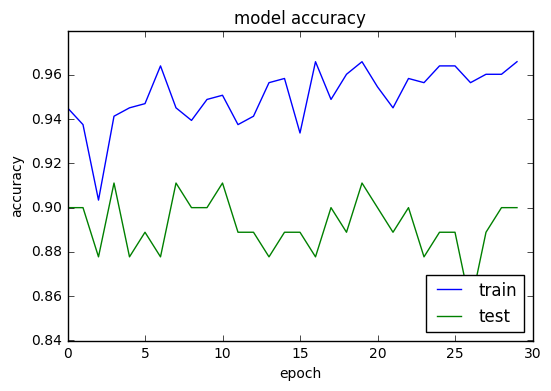

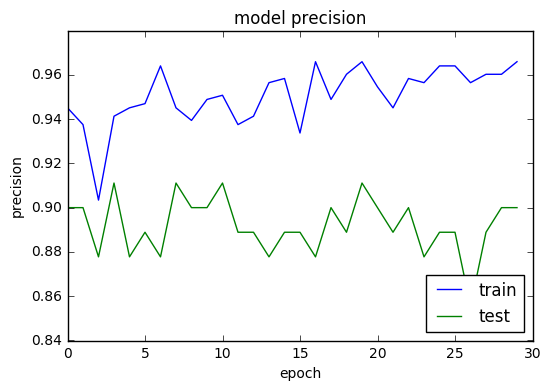

X shape: (90, 34, 56, 1)
90 samples
Evaluating ensemble
90/90 [==============================] - 0s     
Test accuracy: 92.2222231494 %
Test error: 7.77777857251 %
90/90 [==============================] - 0s     

Example of correct predictions for char: R


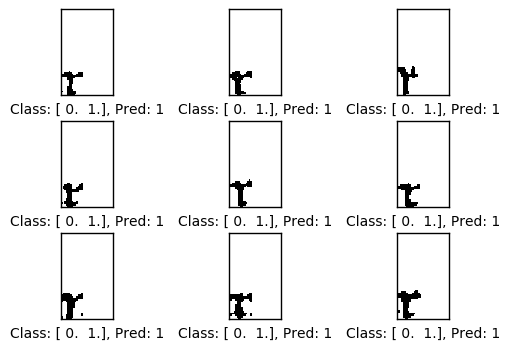


Example of incorrect predictions for char: R

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[42  3]
 [ 4 41]]


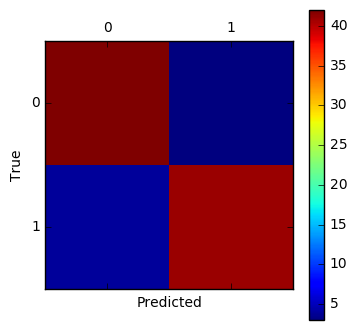


---- END ANALISYS FOR CHAR R
 ----
Trovati 100 esempi positivi per il carattere S_MEDIANA .
Campioni di training: 85 	Campioni di test: 15
Richiesti 100 esempi negativi: trovati 100 generici.
Numero totale di campioni di training: 170
Numero totale di campioni di test: 30

---- START ANALISYS FOR CHAR S_MEDIANA ----

Start TRAINING for char S_MEDIANA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 45 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Done.



The TRAINING lasted 156.88 seconds
History: 


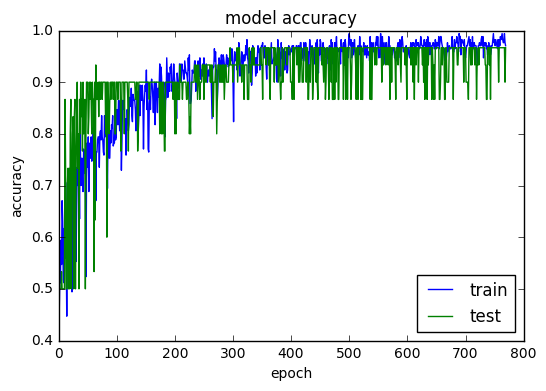

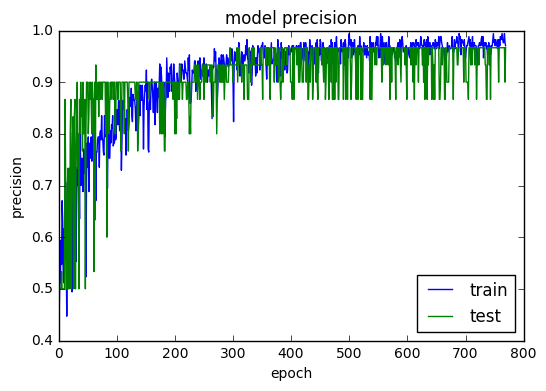

Continuation of training with no pre-processing:


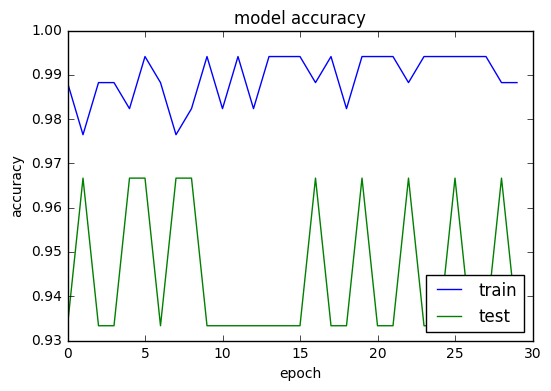

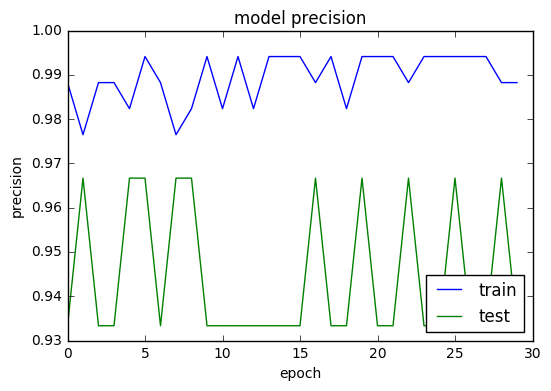

X shape: (30, 34, 56, 1)
30 samples
Evaluating ensemble
30/30 [==============================] - 1s
Test accuracy: 96.6666698456 %
Test error: 3.33333611488 %
30/30 [==============================] - 0s

Example of correct predictions for char: S_MEDIANA


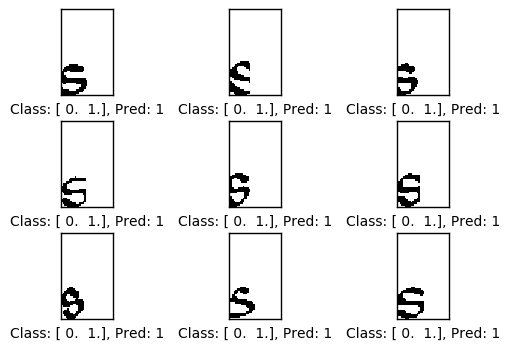


Example of incorrect predictions for char: S_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[14  1]
 [ 0 15]]


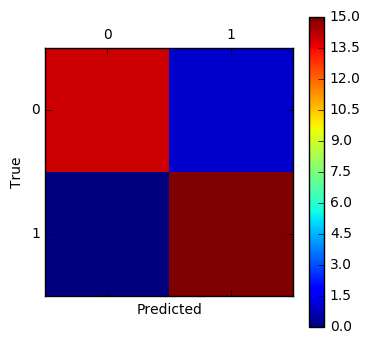


---- END ANALISYS FOR CHAR S_MEDIANA
 ----
Trovati 1530 esempi positivi per il carattere T .
Campioni di training: 1311 	Campioni di test: 219
Richiesti 1530 esempi negativi: trovati 1530 generici.
Numero totale di campioni di training: 2622
Numero totale di campioni di test: 438

---- START ANALISYS FOR CHAR T ----

Start TRAINING for char T
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Done.



The TRAINING lasted 1906.88 seconds
History: 


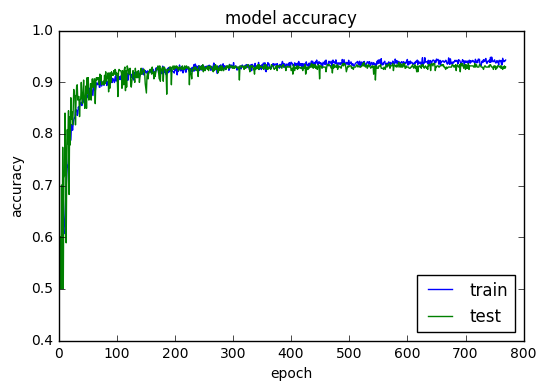

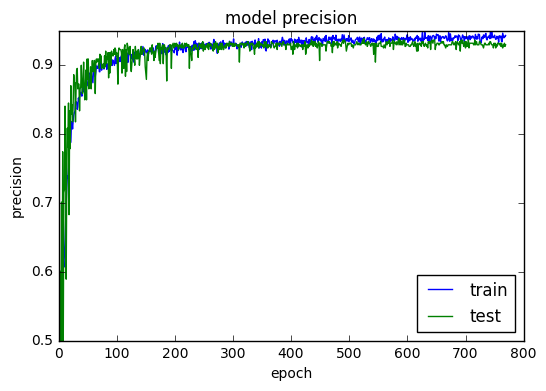

Continuation of training with no pre-processing:


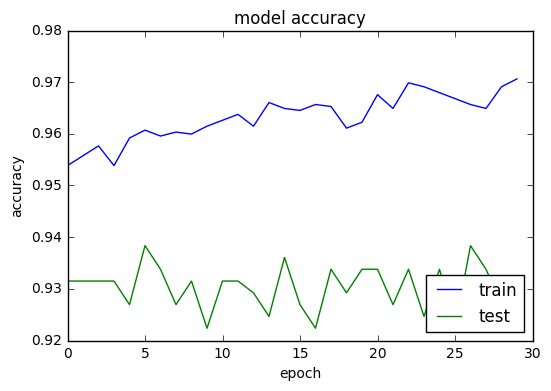

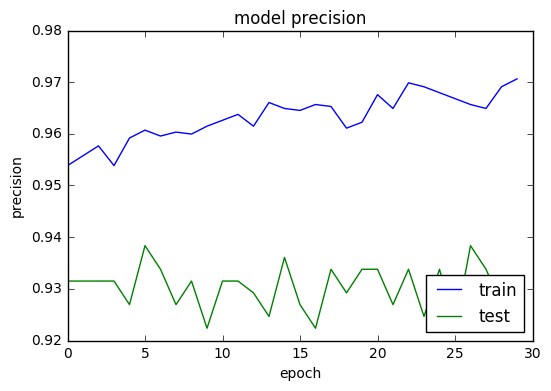

X shape: (438, 34, 56, 1)
438 samples
Evaluating ensemble
438/438 [==============================] - 1s     
Test accuracy: 93.8356164384 %
Test error: 6.16438356164 %
416/438 [===========================>..] - ETA: 0s
Example of correct predictions for char: T


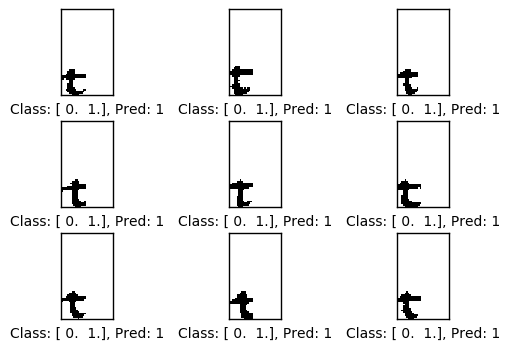


Example of incorrect predictions for char: T


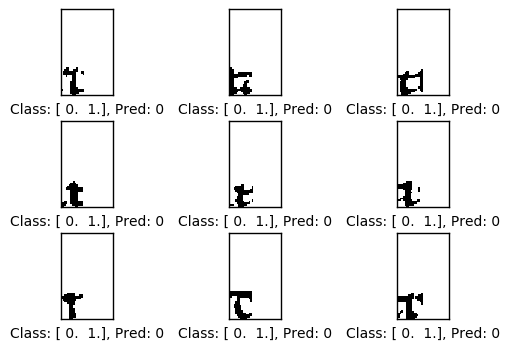

[[201  18]
 [  9 210]]


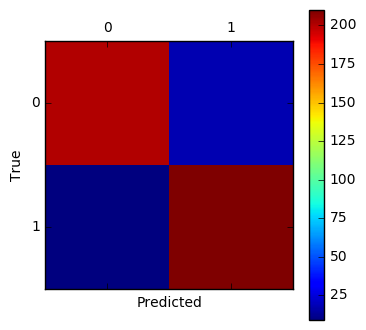


---- END ANALISYS FOR CHAR T
 ----
Trovati 1146 esempi positivi per il carattere U .
Campioni di training: 982 	Campioni di test: 164
Richiesti 1146 esempi negativi: trovati 1146 generici.
Numero totale di campioni di training: 1964
Numero totale di campioni di test: 328

---- START ANALISYS FOR CHAR U ----

Start TRAINING for char U
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 40 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 19 epoch(s)
Done.



The TRAINING lasted 1461.99 seconds
History: 


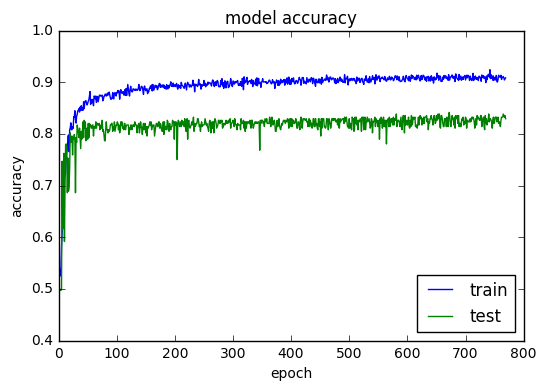

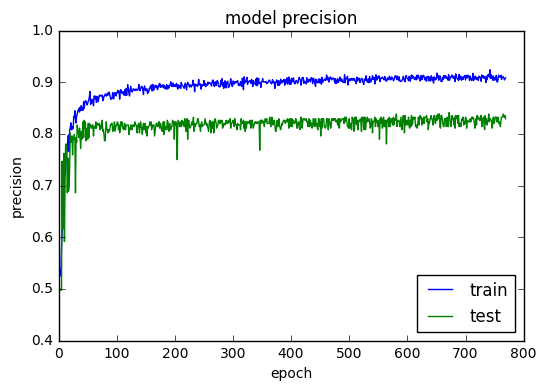

Continuation of training with no pre-processing:


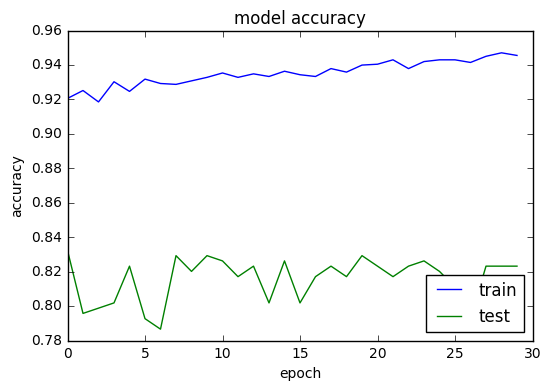

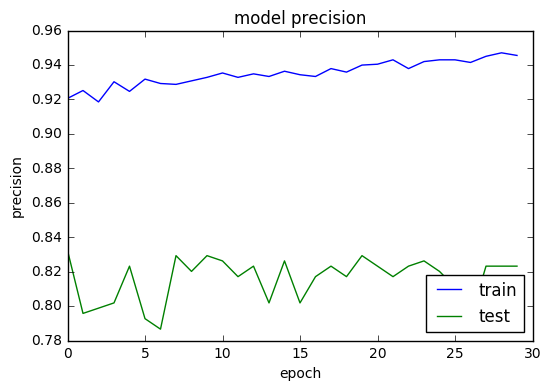

X shape: (328, 34, 56, 1)
328 samples
Evaluating ensemble
328/328 [==============================] - 1s     
Test accuracy: 84.4512195122 %
Test error: 15.5487804878 %
320/328 [============================>.] - ETA: 0s
Example of correct predictions for char: U


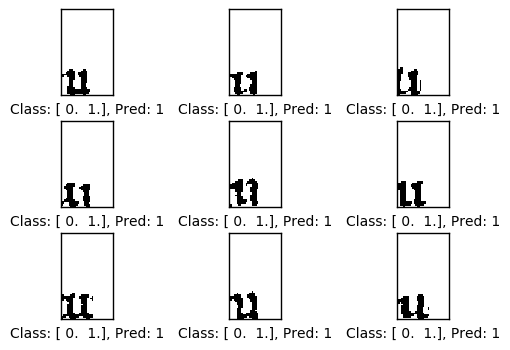


Example of incorrect predictions for char: U


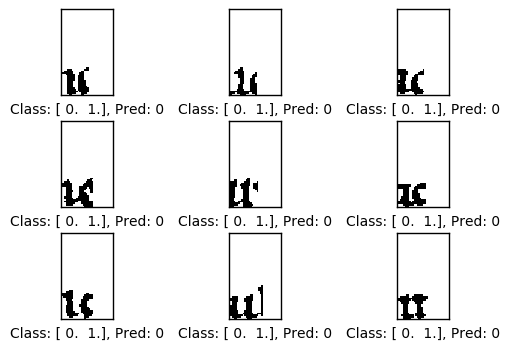

[[127  37]
 [ 14 150]]


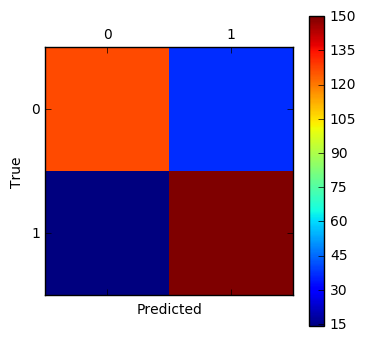


---- END ANALISYS FOR CHAR U
 ----
Trovati 599 esempi positivi per il carattere D_ALTA .
Campioni di training: 513 	Campioni di test: 86
Richiesti 599 esempi negativi: trovati 599 generici.
Numero totale di campioni di training: 1026
Numero totale di campioni di test: 172

---- START ANALISYS FOR CHAR D_ALTA ----

Start TRAINING for char D_ALTA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Done.



The TRAINING lasted 1206.90 seconds
History: 


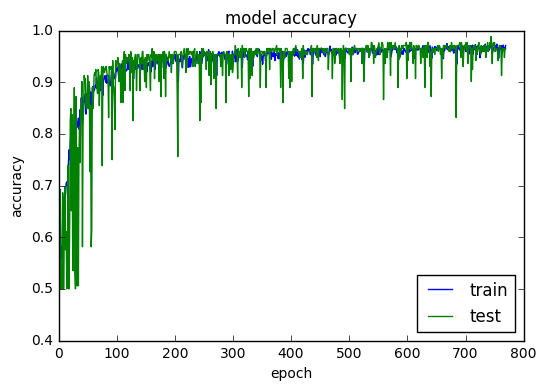

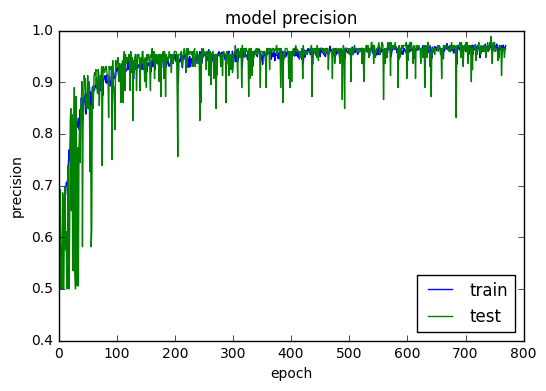

Continuation of training with no pre-processing:


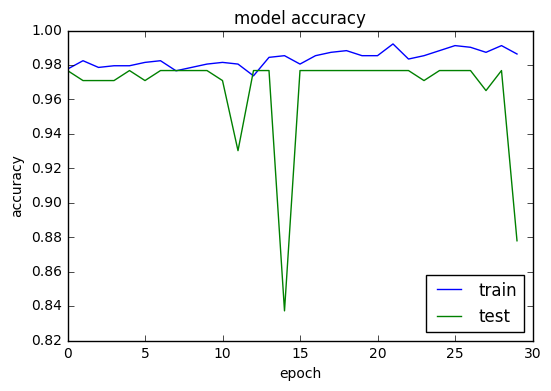

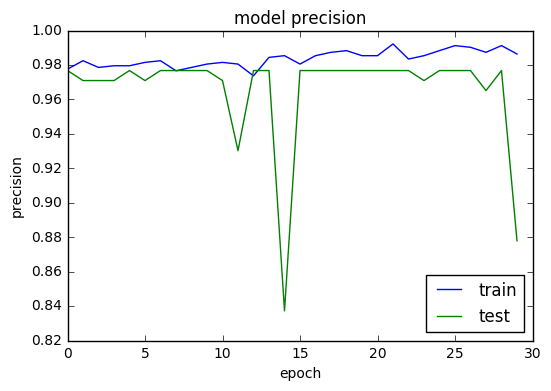

X shape: (172, 34, 56, 1)
172 samples
Evaluating ensemble
160/172 [==========================>...] - ETA: 0sTest accuracy: 98.2558139535 %
Test error: 1.74418604651 %
160/172 [==========================>...] - ETA: 0s
Example of correct predictions for char: D_ALTA


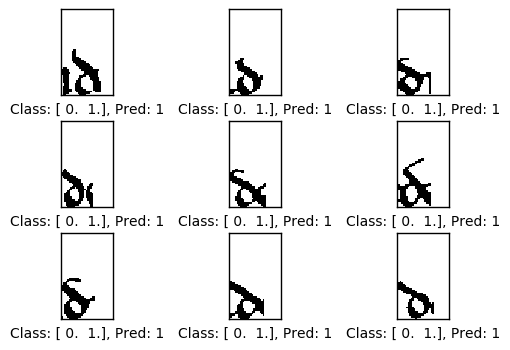


Example of incorrect predictions for char: D_ALTA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[85  1]
 [ 2 84]]


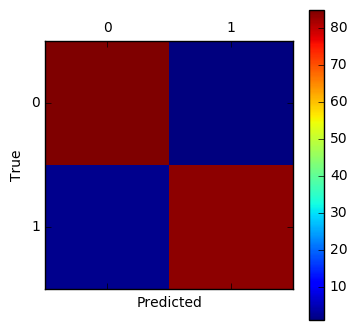


---- END ANALISYS FOR CHAR D_ALTA
 ----
Trovati 796 esempi positivi per il carattere S_ALTA .
Campioni di training: 682 	Campioni di test: 114
Richiesti 796 esempi negativi: trovati 796 generici.
Numero totale di campioni di training: 1364
Numero totale di campioni di test: 228

---- START ANALISYS FOR CHAR S_ALTA ----

Start TRAINING for char S_ALTA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 32 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 28 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Done.



The TRAINING lasted 1018.12 seconds
History: 


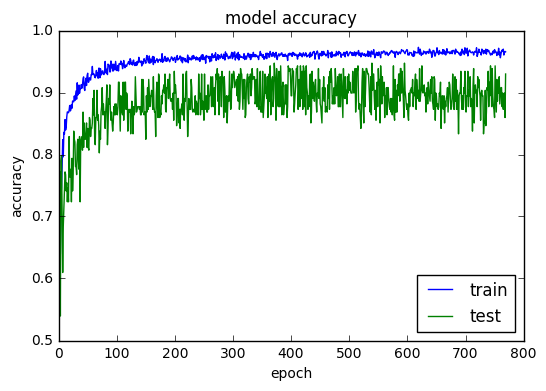

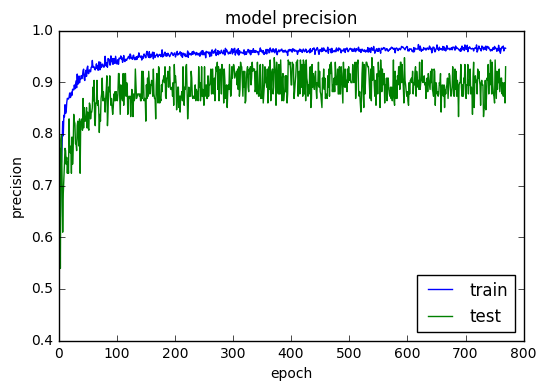

Continuation of training with no pre-processing:


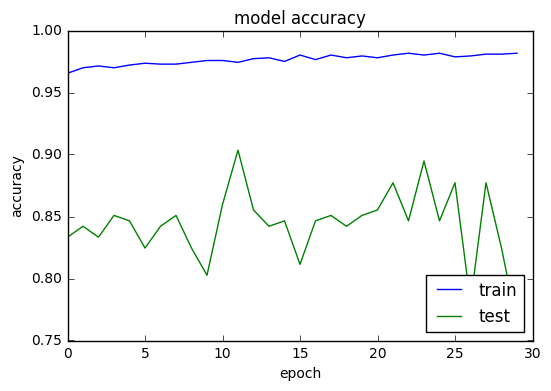

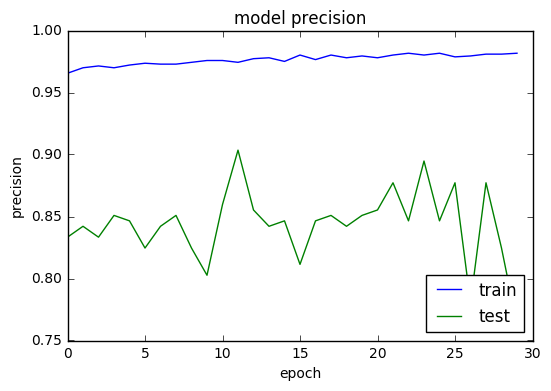

X shape: (228, 34, 56, 1)
228 samples
Evaluating ensemble
228/228 [==============================] - 1s     
Test accuracy: 93.8596491228 %
Test error: 6.14035087719 %
224/228 [============================>.] - ETA: 0s
Example of correct predictions for char: S_ALTA


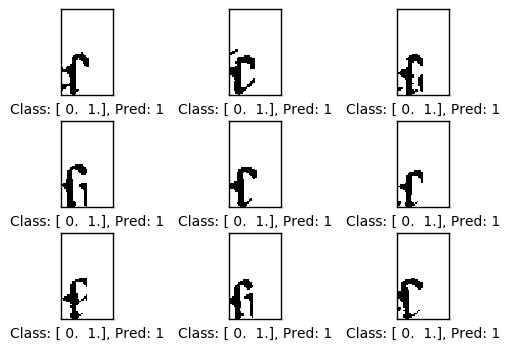


Example of incorrect predictions for char: S_ALTA


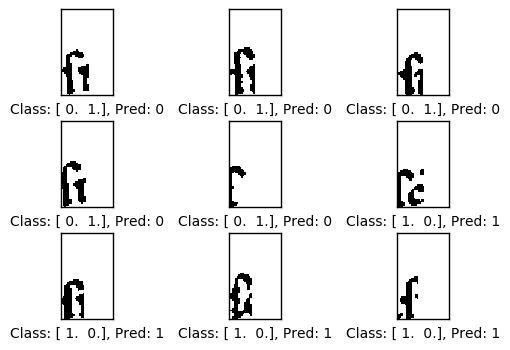

[[105   9]
 [  5 109]]


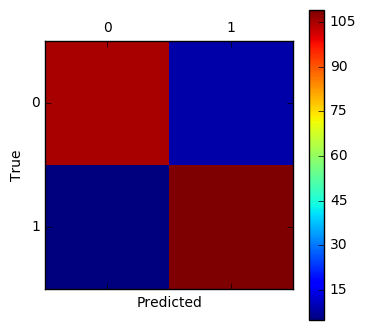


---- END ANALISYS FOR CHAR S_ALTA
 ----
Trovati 554 esempi positivi per il carattere B .
Campioni di training: 474 	Campioni di test: 80
Richiesti 554 esempi negativi: trovati 554 generici.
Numero totale di campioni di training: 948
Numero totale di campioni di test: 160

---- START ANALISYS FOR CHAR B ----

Start TRAINING for char B
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 19 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 28 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Done.



The TRAINING lasted 735.61 seconds
History: 


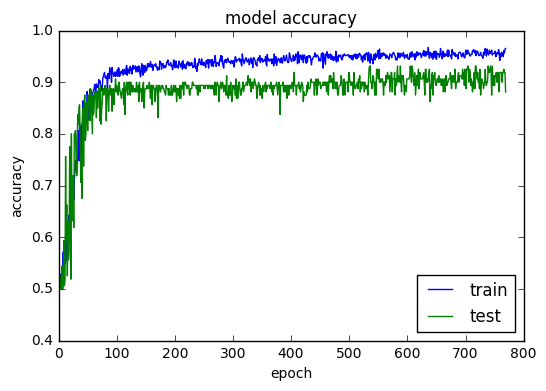

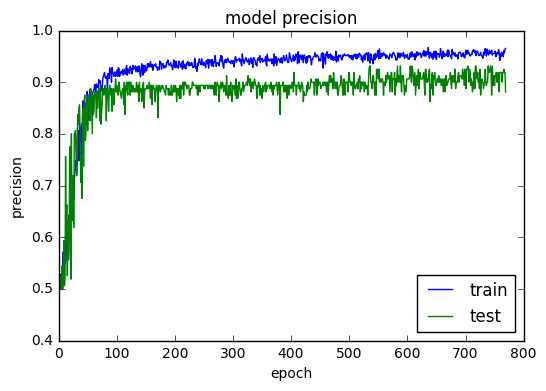

Continuation of training with no pre-processing:


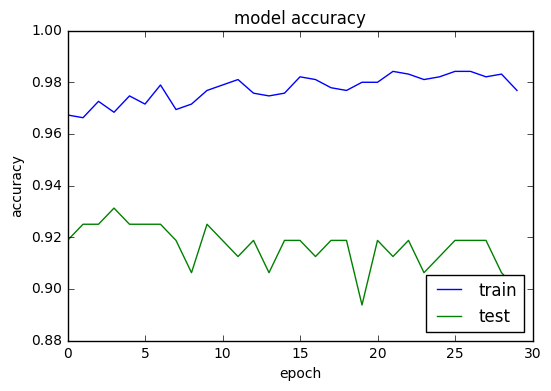

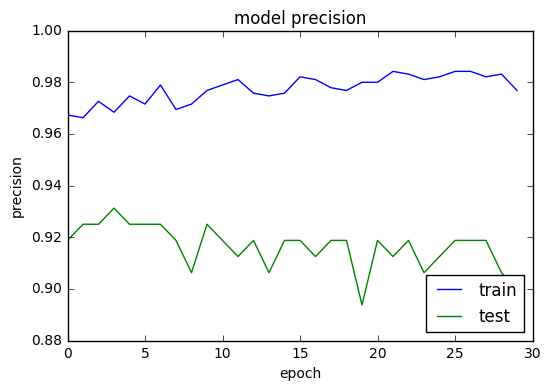

X shape: (160, 34, 56, 1)
160 samples
Evaluating ensemble
160/160 [==============================] - 1s     
Test accuracy: 93.125 %
Test error: 6.875 %
160/160 [==============================] - 1s     

Example of correct predictions for char: B


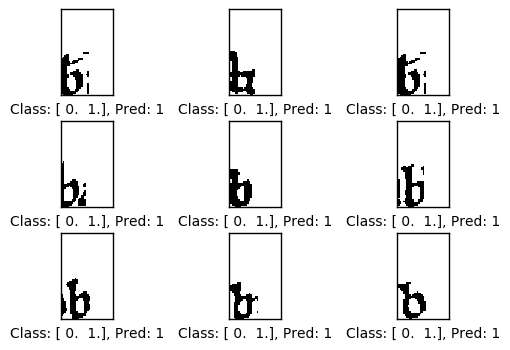


Example of incorrect predictions for char: B


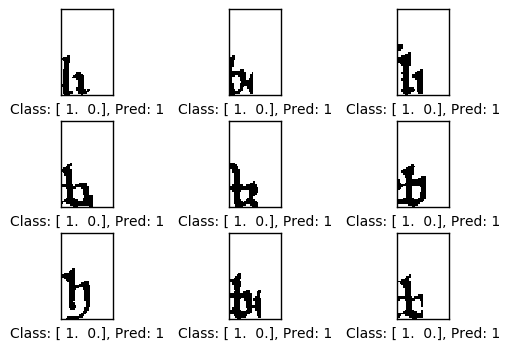

[[69 11]
 [ 0 80]]


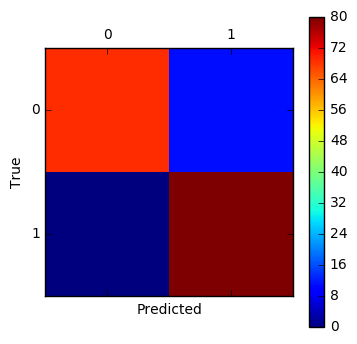


---- END ANALISYS FOR CHAR B
 ----
Trovati 140 esempi positivi per il carattere F .
Campioni di training: 120 	Campioni di test: 20
Richiesti 140 esempi negativi: trovati 140 generici.
Numero totale di campioni di training: 240
Numero totale di campioni di test: 40

---- START ANALISYS FOR CHAR F ----

Start TRAINING for char F
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Done.



The TRAINING lasted 213.53 seconds
History: 


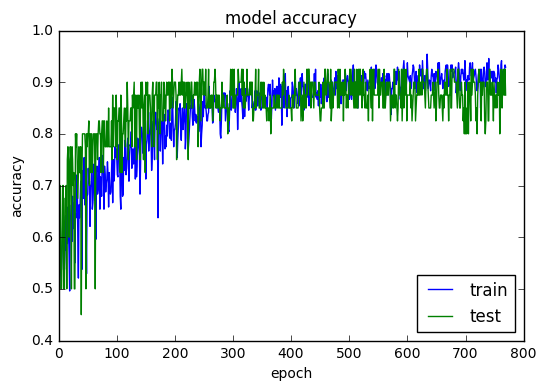

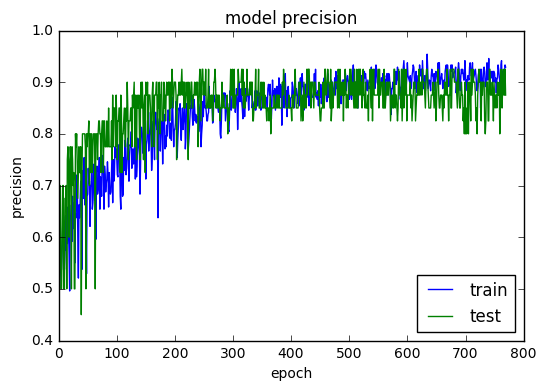

Continuation of training with no pre-processing:


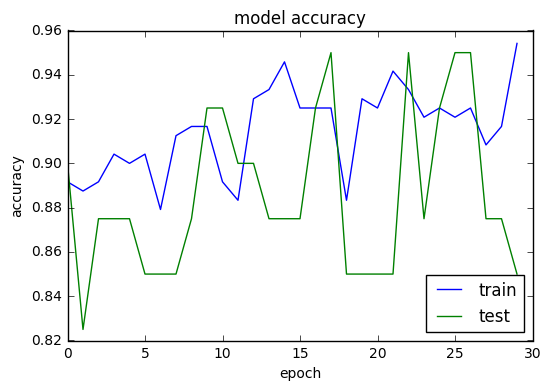

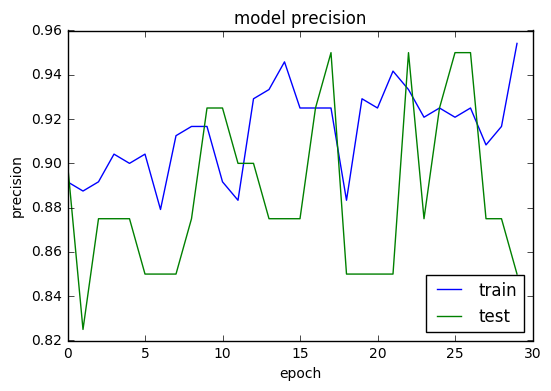

X shape: (40, 34, 56, 1)
40 samples
Evaluating ensemble
32/40 [=======================>......] - ETA: 0sTest accuracy: 92.5 %
Test error: 7.5 %
32/40 [=======================>......] - ETA: 0s
Example of correct predictions for char: F


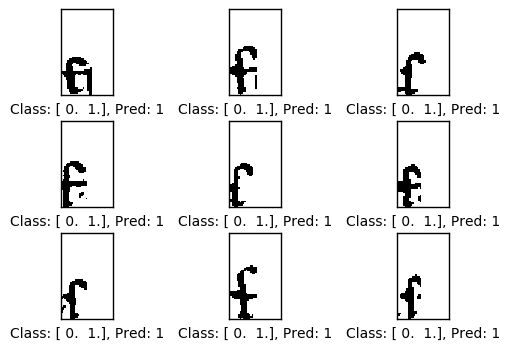


Example of incorrect predictions for char: F

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[19  1]
 [ 2 18]]


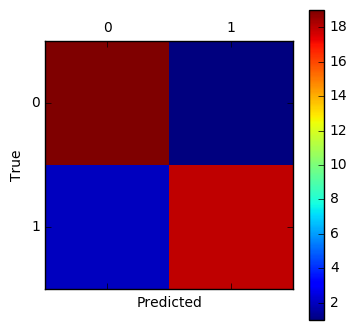


---- END ANALISYS FOR CHAR F
 ----
Trovati 123 esempi positivi per il carattere H .
Campioni di training: 105 	Campioni di test: 18
Richiesti 123 esempi negativi: trovati 123 generici.
Numero totale di campioni di training: 210
Numero totale di campioni di test: 36

---- START ANALISYS FOR CHAR H ----

Start TRAINING for char H
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 31 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 15 epoch(s)
Done.



The TRAINING lasted 198.87 seconds
History: 


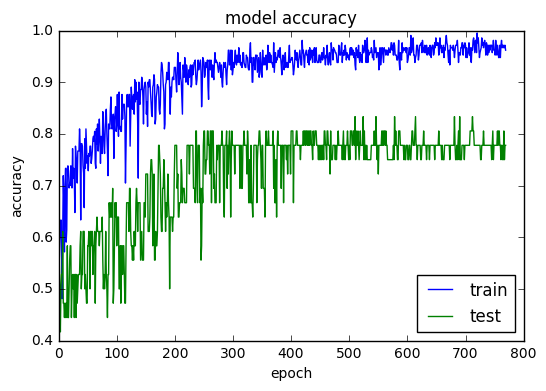

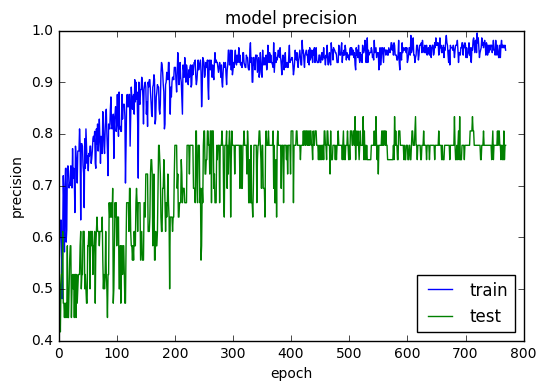

Continuation of training with no pre-processing:


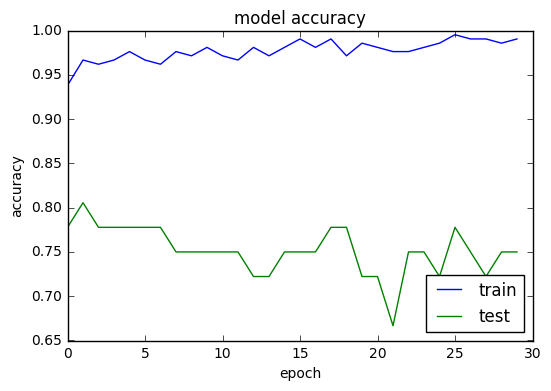

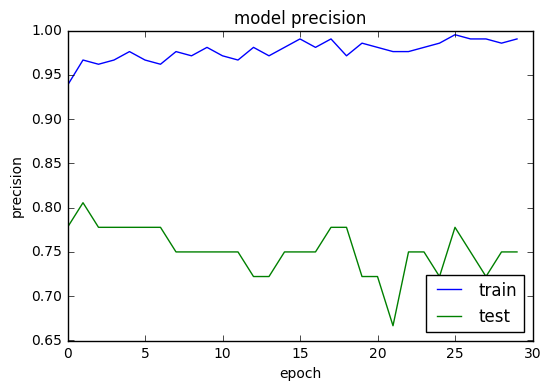

X shape: (36, 34, 56, 1)
36 samples
Evaluating ensemble
32/36 [=========================>....] - ETA: 0sTest accuracy: 80.5555555556 %
Test error: 19.4444444444 %
32/36 [=========================>....] - ETA: 0s
Example of correct predictions for char: H


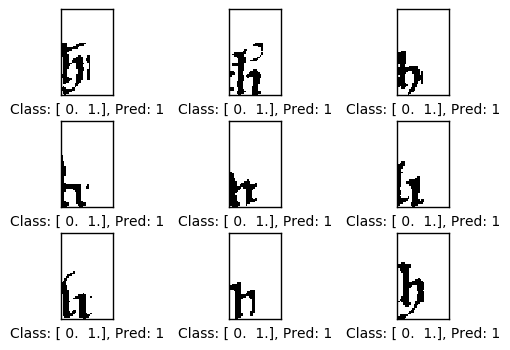


Example of incorrect predictions for char: H

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[15  3]
 [ 4 14]]


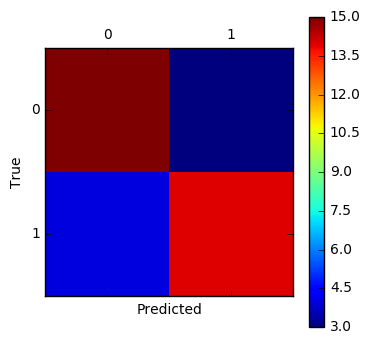


---- END ANALISYS FOR CHAR H
 ----
Trovati 390 esempi positivi per il carattere L .
Campioni di training: 334 	Campioni di test: 56
Richiesti 390 esempi negativi: trovati 390 generici.
Numero totale di campioni di training: 668
Numero totale di campioni di test: 112

---- START ANALISYS FOR CHAR L ----

Start TRAINING for char L
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 41 epoch(s)
Done.



The TRAINING lasted 558.38 seconds
History: 


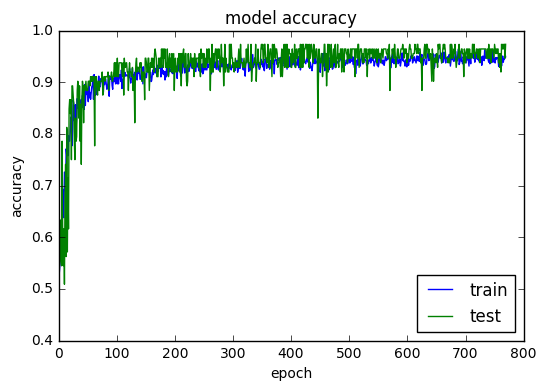

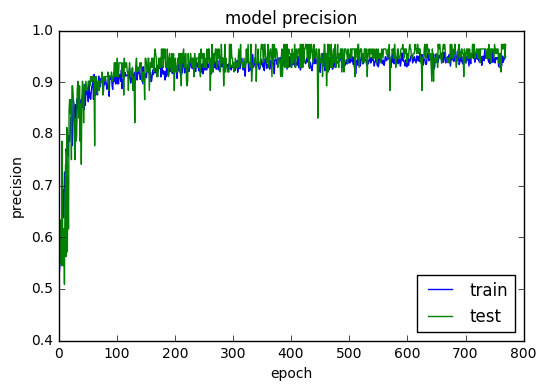

Continuation of training with no pre-processing:


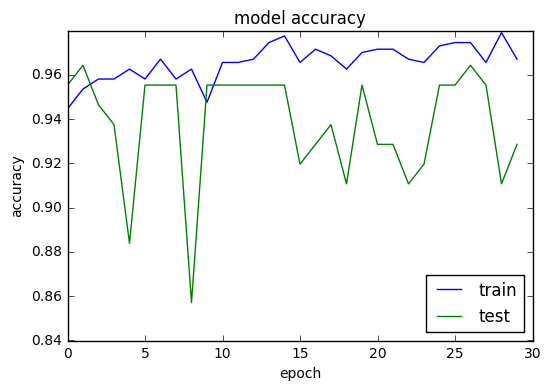

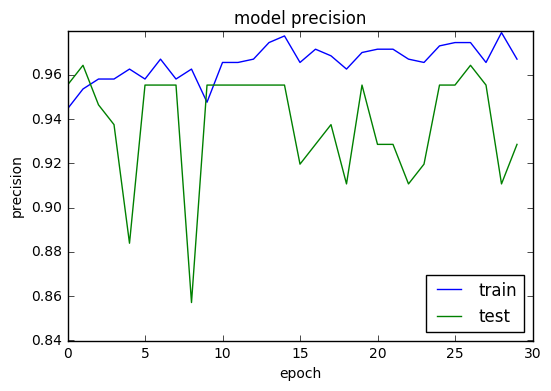

X shape: (112, 34, 56, 1)
112 samples
Evaluating ensemble
 96/112 [========================>.....] - ETA: 0sTest accuracy: 97.3214285714 %
Test error: 2.67857142857 %
 96/112 [========================>.....] - ETA: 0s
Example of correct predictions for char: L


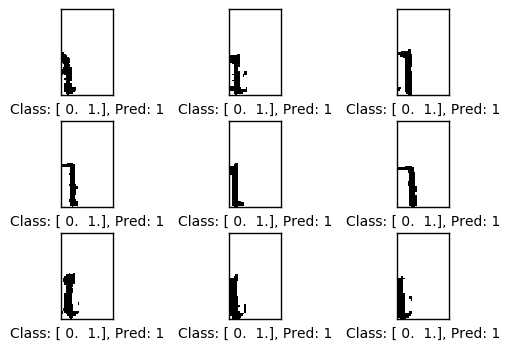


Example of incorrect predictions for char: L

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[53  3]
 [ 0 56]]


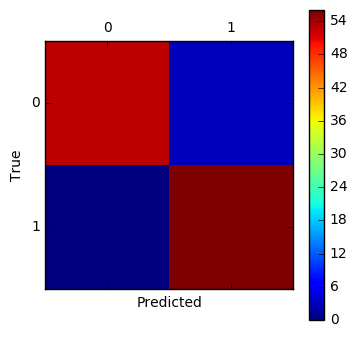


---- END ANALISYS FOR CHAR L
 ----
Trovati 347 esempi positivi per il carattere G .
Campioni di training: 297 	Campioni di test: 50
Richiesti 347 esempi negativi: trovati 347 generici.
Numero totale di campioni di training: 594
Numero totale di campioni di test: 100

---- START ANALISYS FOR CHAR G ----

Start TRAINING for char G
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 14 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 17 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 23 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 49 epoch(s)
Done.



The TRAINING lasted 496.86 seconds
History: 


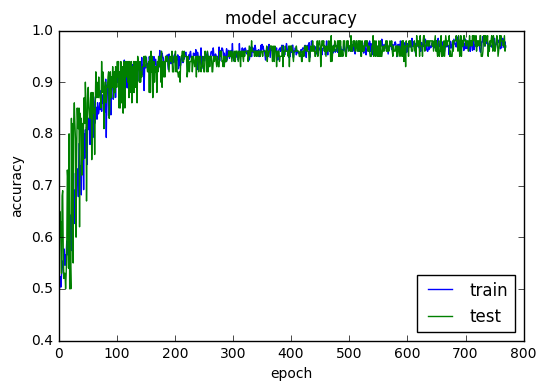

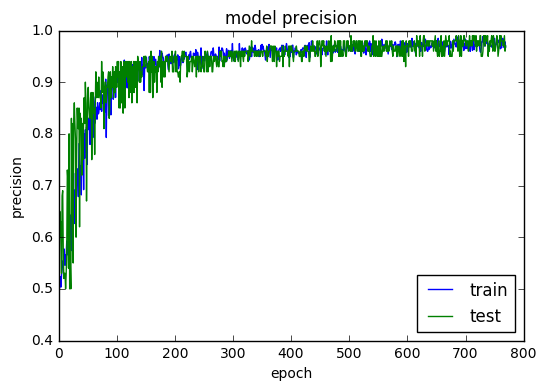

Continuation of training with no pre-processing:


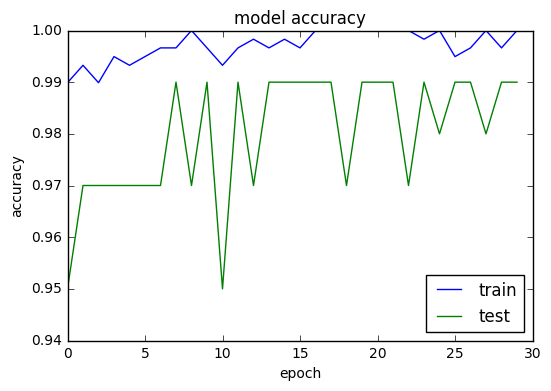

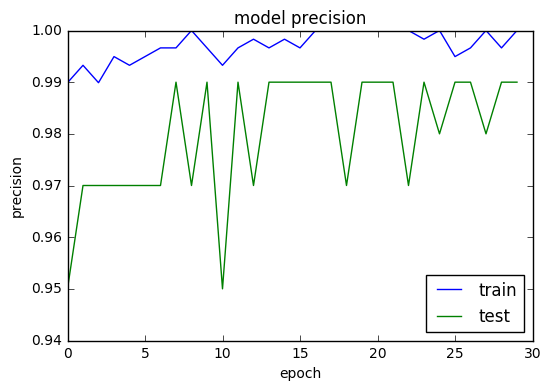

X shape: (100, 34, 56, 1)
100 samples
Evaluating ensemble
 96/100 [===========================>..] - ETA: 0sTest accuracy: 99.0 %
Test error: 1.0 %
 96/100 [===========================>..] - ETA: 0s
Example of correct predictions for char: G


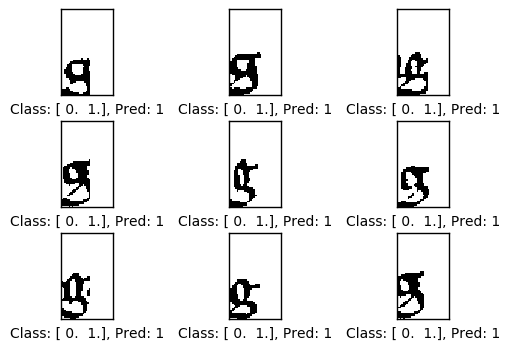


Example of incorrect predictions for char: G

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[49  1]
 [ 0 50]]


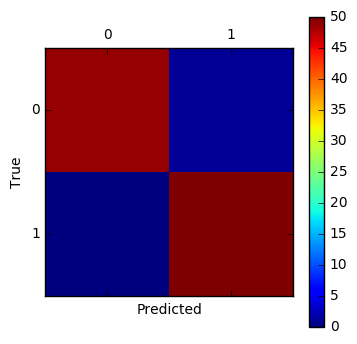


---- END ANALISYS FOR CHAR G
 ----
Trovati 1255 esempi positivi per il carattere P .
Campioni di training: 1075 	Campioni di test: 180
Richiesti 1255 esempi negativi: trovati 1255 generici.
Numero totale di campioni di training: 2150
Numero totale di campioni di test: 360

---- START ANALISYS FOR CHAR P ----

Start TRAINING for char P
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 44 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 49 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Done.



The TRAINING lasted 1642.89 seconds
History: 


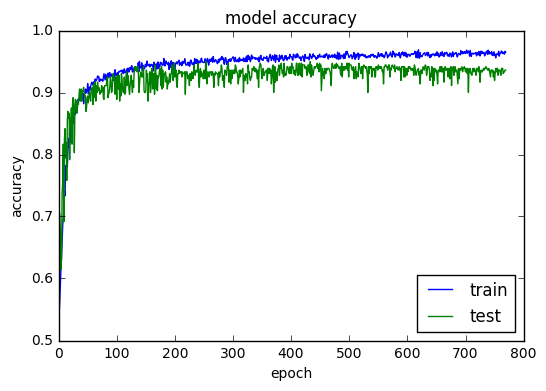

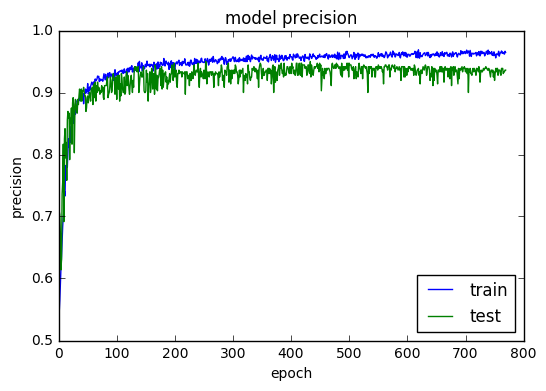

Continuation of training with no pre-processing:


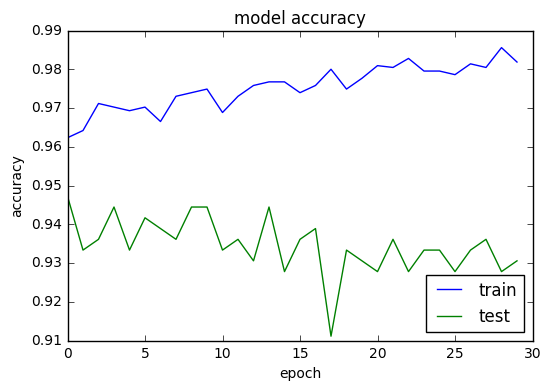

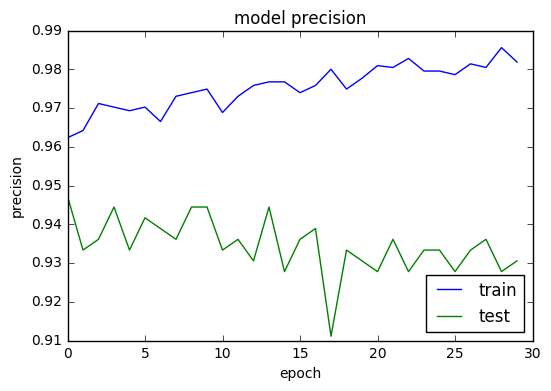

X shape: (360, 34, 56, 1)
360 samples
Evaluating ensemble
352/360 [============================>.] - ETA: 0sTest accuracy: 93.8888888889 %
Test error: 6.11111111111 %
352/360 [============================>.] - ETA: 0s
Example of correct predictions for char: P


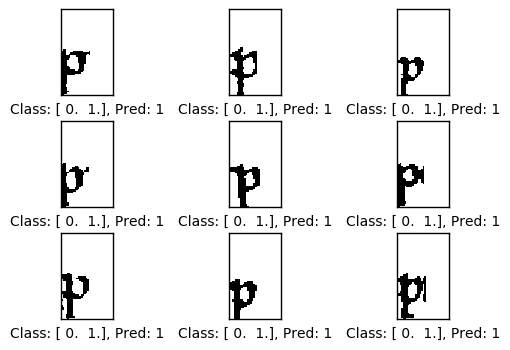


Example of incorrect predictions for char: P


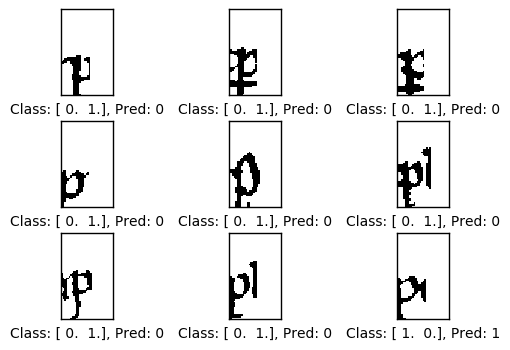

[[166  14]
 [  8 172]]


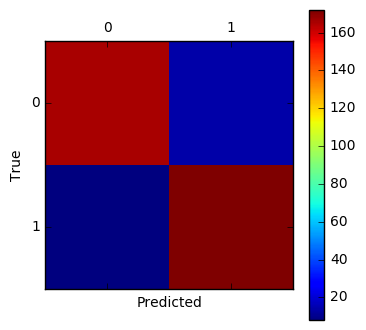


---- END ANALISYS FOR CHAR P
 ----
Trovati 460 esempi positivi per il carattere Q .
Campioni di training: 394 	Campioni di test: 66
Richiesti 460 esempi negativi: trovati 460 generici.
Numero totale di campioni di training: 788
Numero totale di campioni di test: 132

---- START ANALISYS FOR CHAR Q ----

Start TRAINING for char Q
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 46 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 37 epoch(s)
Done.



The TRAINING lasted 687.69 seconds
History: 


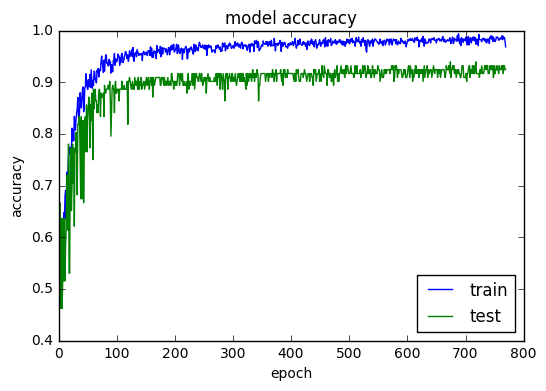

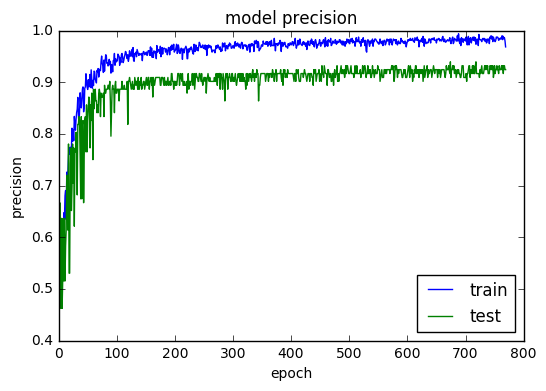

Continuation of training with no pre-processing:


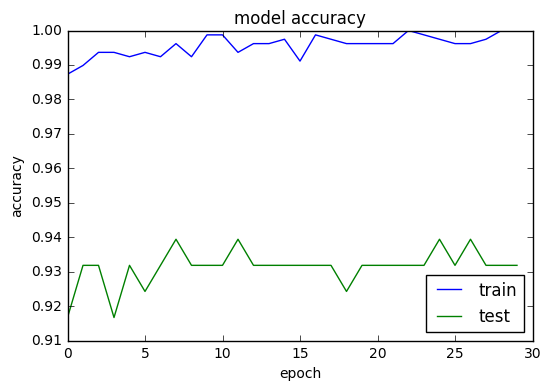

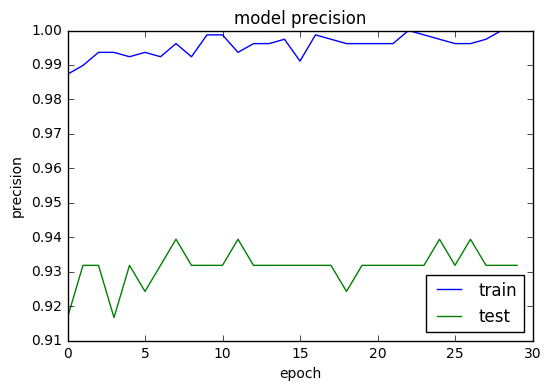

X shape: (132, 34, 56, 1)
132 samples
Evaluating ensemble
128/132 [============================>.] - ETA: 0sTest accuracy: 92.4242424242 %
Test error: 7.57575757576 %
128/132 [============================>.] - ETA: 0s
Example of correct predictions for char: Q


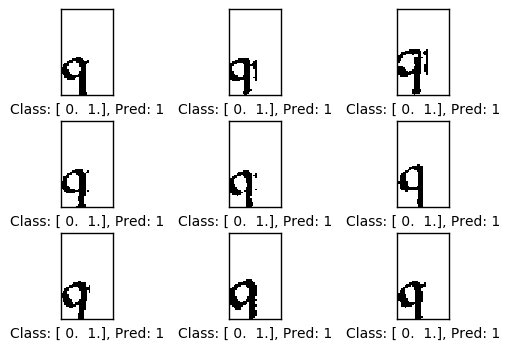


Example of incorrect predictions for char: Q


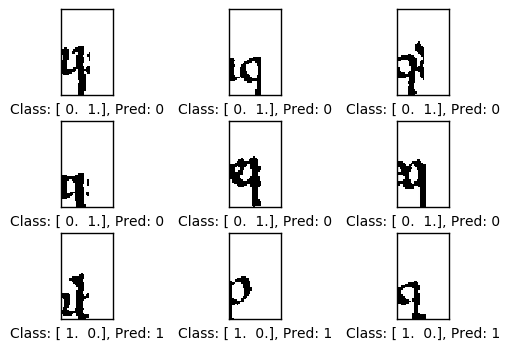

[[62  4]
 [ 6 60]]


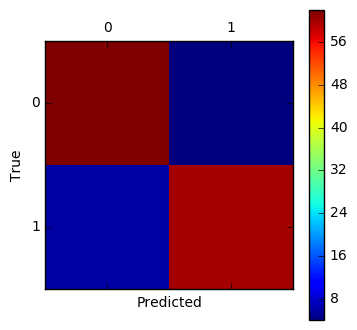


---- END ANALISYS FOR CHAR Q
 ----
Trovati 335 esempi positivi per il carattere S_BASSA .
Campioni di training: 287 	Campioni di test: 48
Richiesti 335 esempi negativi: trovati 335 generici.
Numero totale di campioni di training: 574
Numero totale di campioni di test: 96

---- START ANALISYS FOR CHAR S_BASSA ----

Start TRAINING for char S_BASSA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 40 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 44 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 20 epoch(s)
Done.



The TRAINING lasted 498.17 seconds
History: 


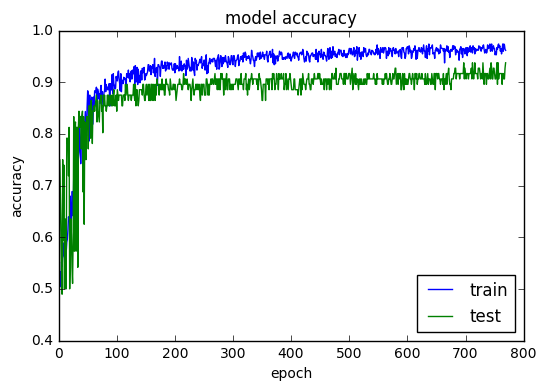

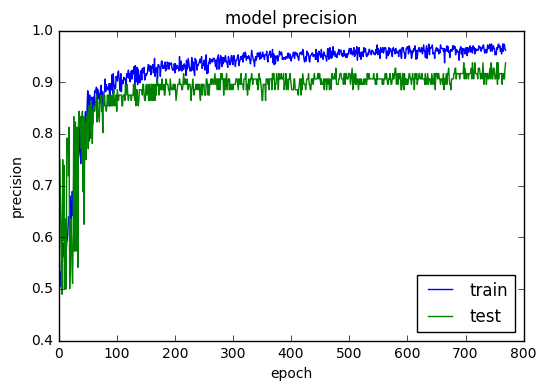

Continuation of training with no pre-processing:


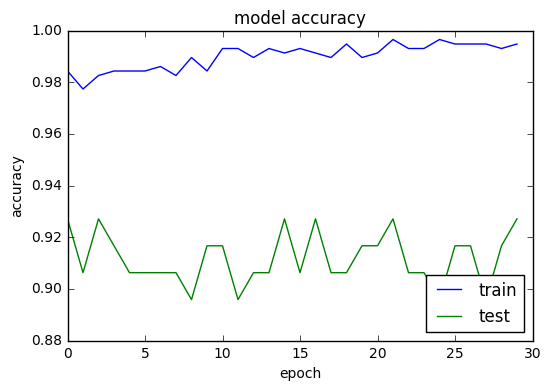

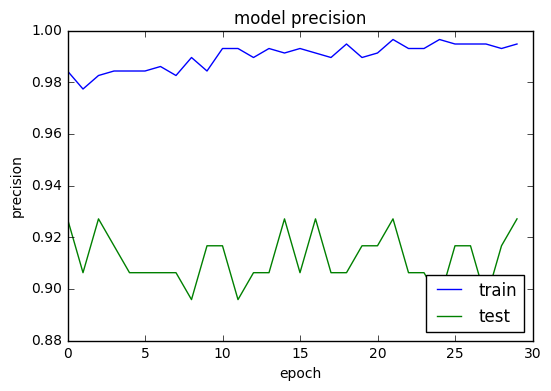

X shape: (96, 34, 56, 1)
96 samples
Evaluating ensemble
96/96 [==============================] - 2s     
Test accuracy: 93.75 %
Test error: 6.25 %
96/96 [==============================] - 2s     

Example of correct predictions for char: S_BASSA


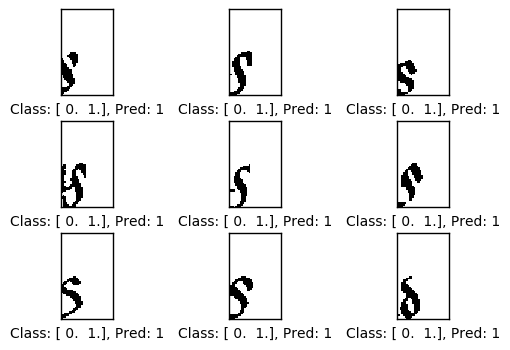


Example of incorrect predictions for char: S_BASSA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[44  4]
 [ 2 46]]


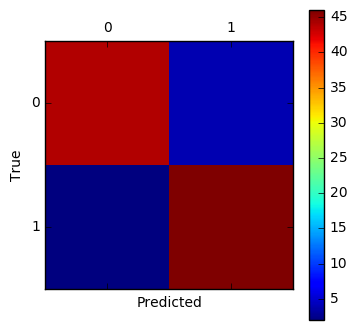


---- END ANALISYS FOR CHAR S_BASSA
 ----


In [4]:
analyze_all_letters()

Trovati 1638 esempi positivi per il carattere A .
Campioni di training: 1404 	Campioni di test: 234
Richiesti 3276 esempi negativi: trovati 3276 generici.
Numero totale di campioni di training: 4212
Numero totale di campioni di test: 702

---- START ANALISYS FOR CHAR A ----

Start TRAINING for char A
You need to train the model first!
X shape: (702, 34, 56, 1)
702 samples
Evaluating ensemble
702/702 [==============================] - 2s     
Test accuracy: 94.7293448652 %
Test error: 5.27065538952 %
702/702 [==============================] - 2s     

Example of correct predictions for char: A


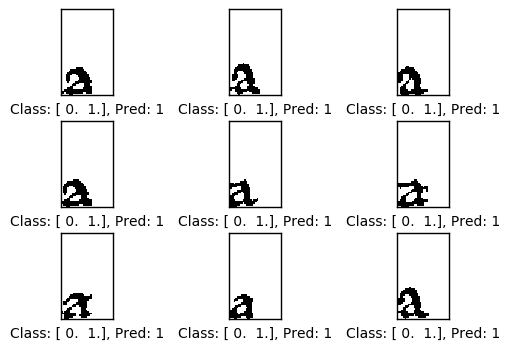


Example of incorrect predictions for char: A


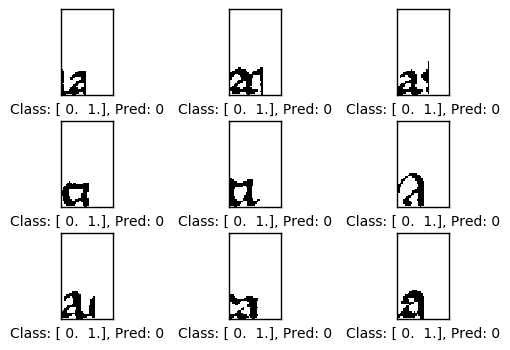

[[441  27]
 [ 10 224]]


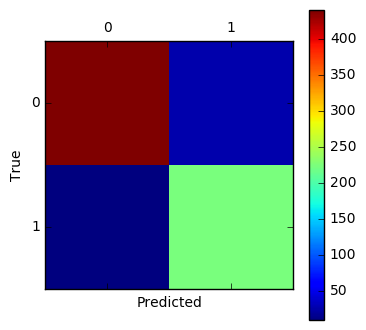


---- END ANALISYS FOR CHAR A
 ----
Trovati 655 esempi positivi per il carattere C .
Campioni di training: 561 	Campioni di test: 94
Richiesti 1310 esempi negativi: trovati 1310 generici.
Numero totale di campioni di training: 1683
Numero totale di campioni di test: 282

---- START ANALISYS FOR CHAR C ----

Start TRAINING for char C
You need to train the model first!
X shape: (282, 34, 56, 1)
282 samples
Evaluating ensemble
282/282 [==============================] - 2s     
Test accuracy: 94.3262414307 %
Test error: 5.67375911889 %
256/282 [==========================>...] - ETA: 0s
Example of correct predictions for char: C


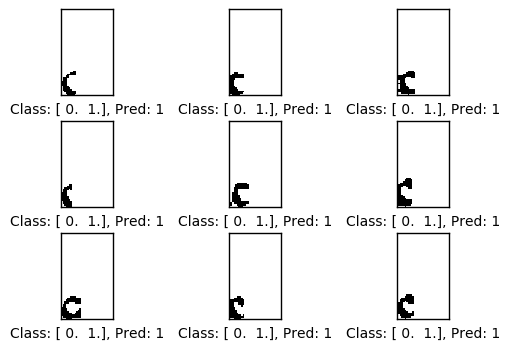


Example of incorrect predictions for char: C


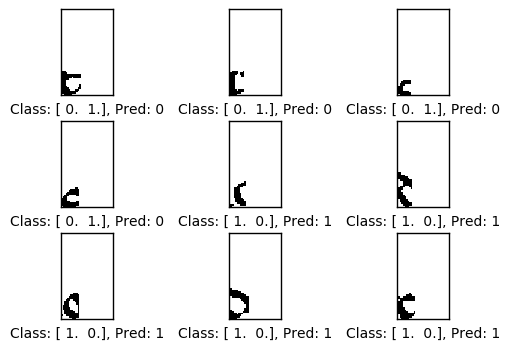

[[176  12]
 [  4  90]]


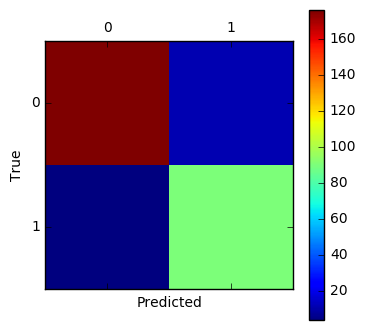


---- END ANALISYS FOR CHAR C
 ----
Trovati 406 esempi positivi per il carattere D_MEDIANA .
Campioni di training: 348 	Campioni di test: 58
Richiesti 812 esempi negativi: trovati 812 generici.
Numero totale di campioni di training: 1044
Numero totale di campioni di test: 174

---- START ANALISYS FOR CHAR D_MEDIANA ----

Start TRAINING for char D_MEDIANA
You need to train the model first!
X shape: (174, 34, 56, 1)
174 samples
Evaluating ensemble
160/174 [==========================>...] - ETA: 0sTest accuracy: 99.4252873563 %
Test error: 0.574712643678 %
160/174 [==========================>...] - ETA: 0s
Example of correct predictions for char: D_MEDIANA


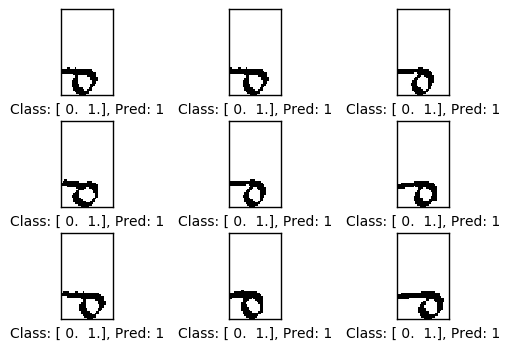


Example of incorrect predictions for char: D_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[115   1]
 [  0  58]]


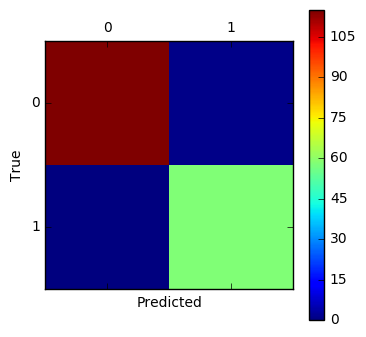


---- END ANALISYS FOR CHAR D_MEDIANA
 ----
Trovati 2827 esempi positivi per il carattere E .
Campioni di training: 2423 	Campioni di test: 404
Richiesti 5654 esempi negativi: trovati 5654 generici.
Numero totale di campioni di training: 7269
Numero totale di campioni di test: 1212

---- START ANALISYS FOR CHAR E ----

Start TRAINING for char E
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 43 epoch(s)
Training model 2 ...
Not pre-processing 48 epoch(s)
Training model 3 ...
Not pre-processing 46 epoch(s)
Training model 4 ...
Not pre-processing 19 epoch(s)
Done.



The TRAINING lasted 5549.13 seconds
History: 


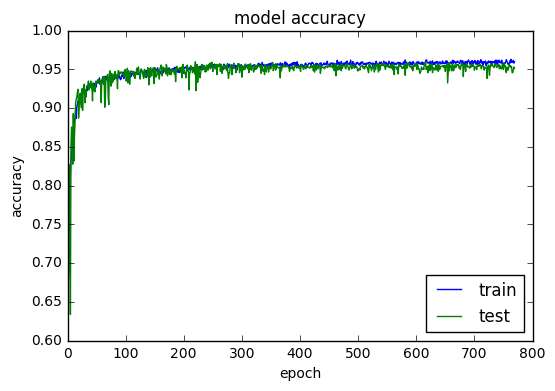

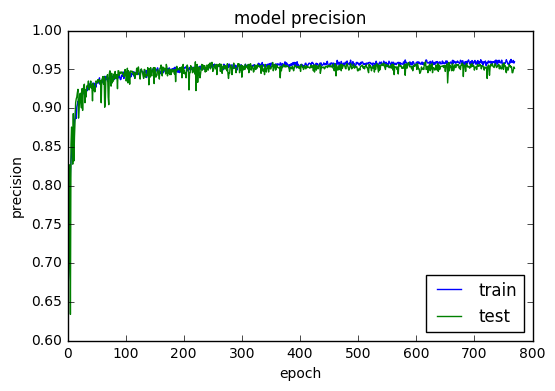

Continuation of training with no pre-processing:


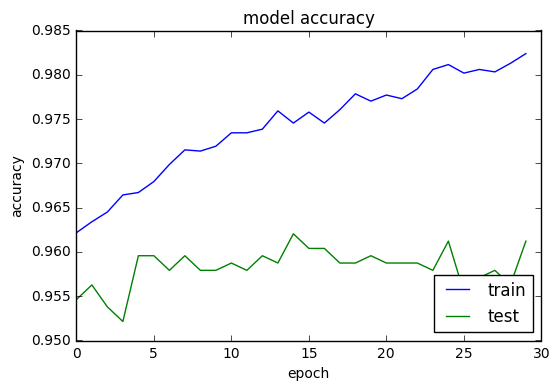

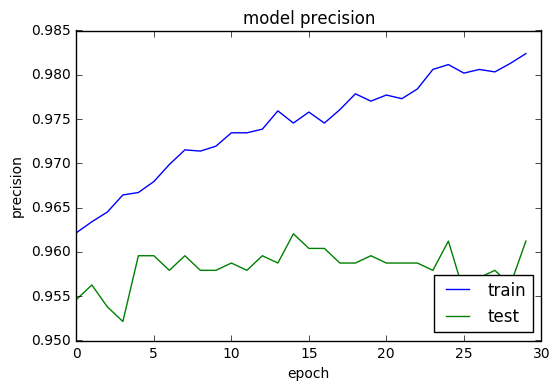

X shape: (1212, 34, 56, 1)
1212 samples
Evaluating ensemble
1212/1212 [==============================] - 3s     
Test accuracy: 96.1221122112 %
Test error: 3.87788778878 %
1184/1212 [============================>.] - ETA: 0s
Example of correct predictions for char: E


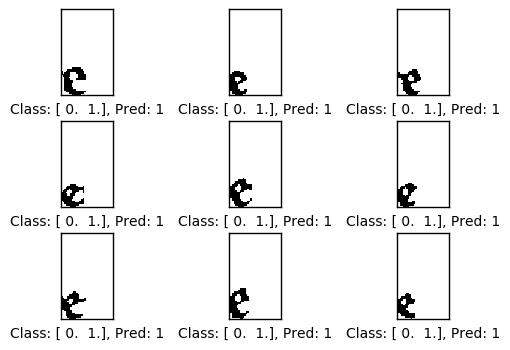


Example of incorrect predictions for char: E


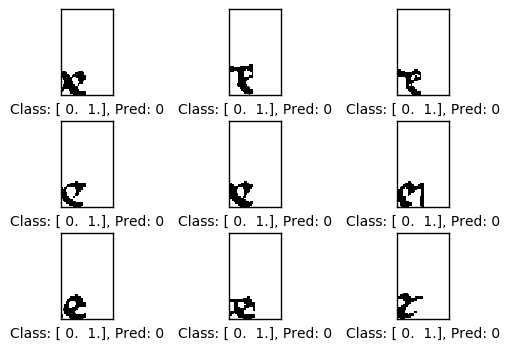

[[777  31]
 [ 16 388]]


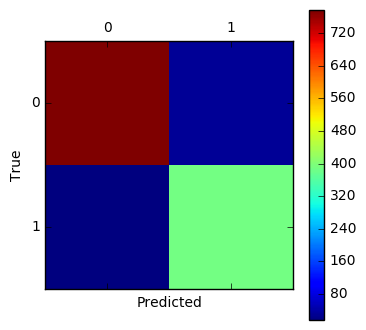


---- END ANALISYS FOR CHAR E
 ----
Trovati 798 esempi positivi per il carattere I .
Campioni di training: 684 	Campioni di test: 114
Richiesti 1596 esempi negativi: trovati 1596 generici.
Numero totale di campioni di training: 2052
Numero totale di campioni di test: 342

---- START ANALISYS FOR CHAR I ----

Start TRAINING for char I
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 20 epoch(s)
Training model 2 ...
Not pre-processing 12 epoch(s)
Training model 3 ...
Not pre-processing 39 epoch(s)
Training model 4 ...
Not pre-processing 32 epoch(s)
Done.



The TRAINING lasted 2189.18 seconds
History: 


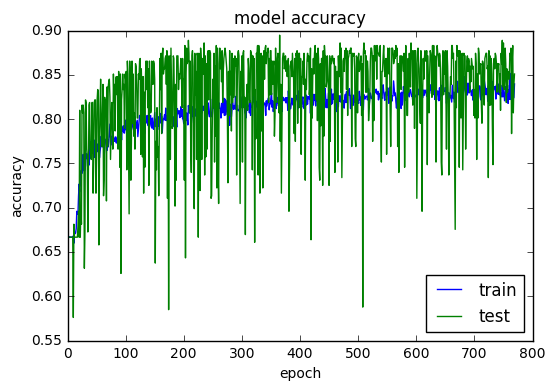

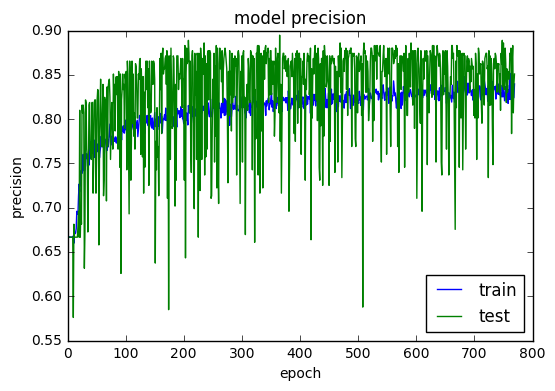

Continuation of training with no pre-processing:


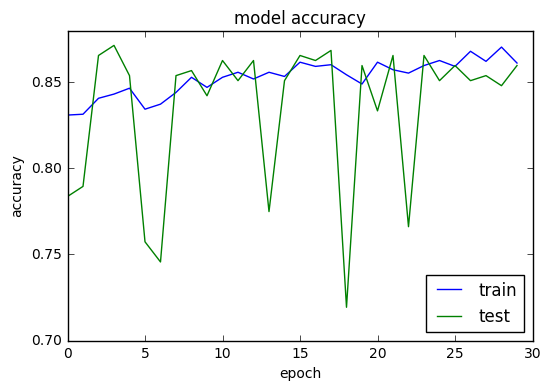

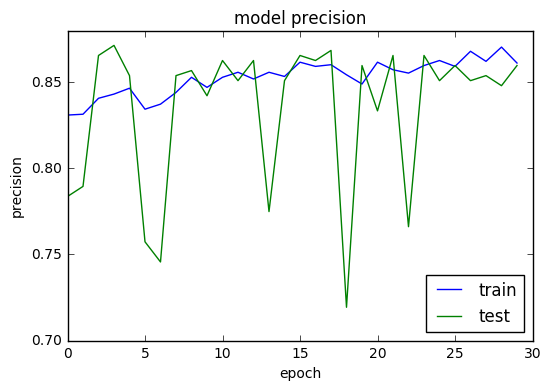

X shape: (342, 34, 56, 1)
342 samples
Evaluating ensemble
342/342 [==============================] - 2s     
Test accuracy: 88.011696255 %
Test error: 11.9883041284 %
342/342 [==============================] - 2s     

Example of correct predictions for char: I


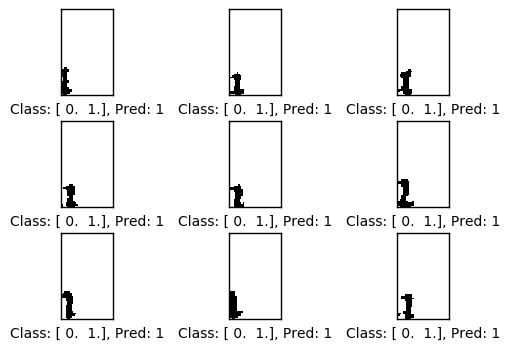


Example of incorrect predictions for char: I


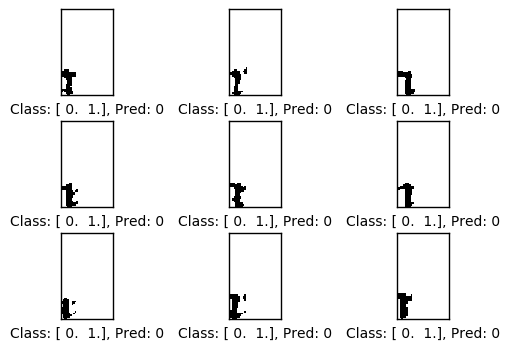

[[204  24]
 [ 17  97]]


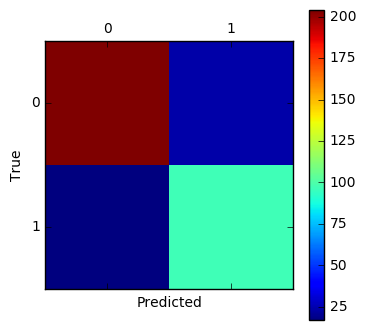


---- END ANALISYS FOR CHAR I
 ----
Trovati 1514 esempi positivi per il carattere M .
Campioni di training: 1297 	Campioni di test: 217
Richiesti 3028 esempi negativi: trovati 3028 generici.
Numero totale di campioni di training: 3892
Numero totale di campioni di test: 650

---- START ANALISYS FOR CHAR M ----

Start TRAINING for char M
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 16 epoch(s)
Training model 2 ...
Not pre-processing 43 epoch(s)
Training model 3 ...
Not pre-processing 32 epoch(s)
Training model 4 ...
Not pre-processing 14 epoch(s)
Done.



The TRAINING lasted 3151.93 seconds
History: 


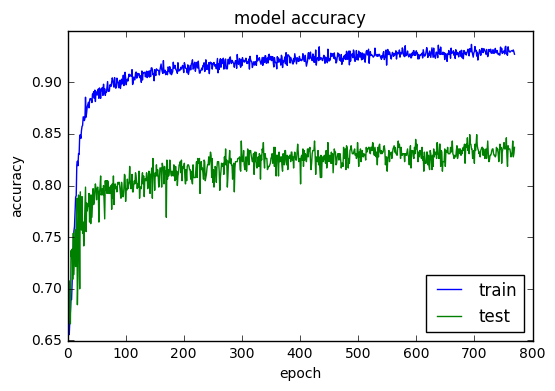

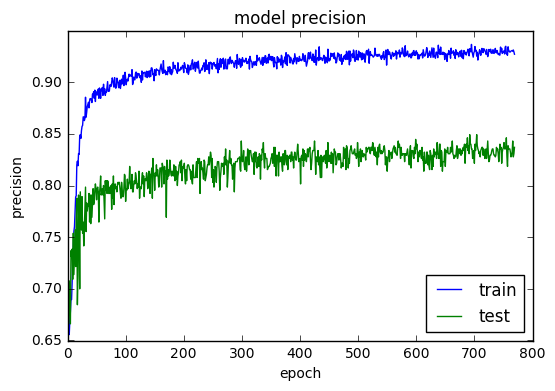

Continuation of training with no pre-processing:


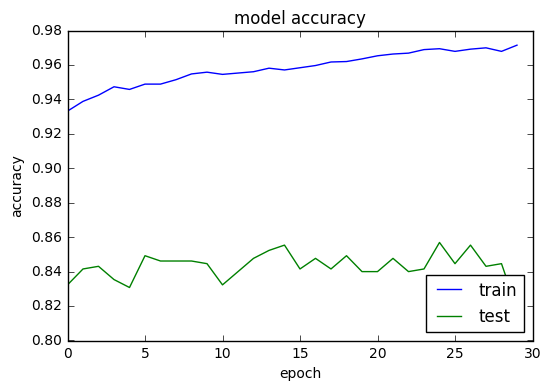

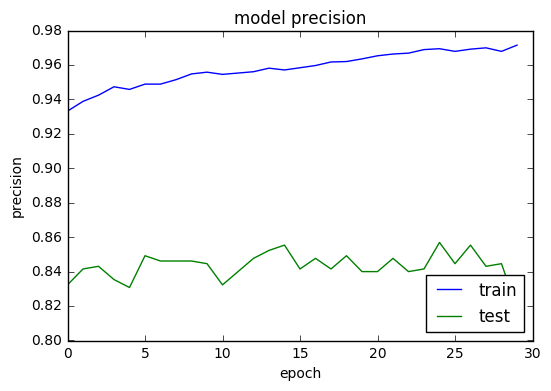

X shape: (650, 34, 56, 1)
650 samples
Evaluating ensemble
640/650 [============================>.] - ETA: 0sTest accuracy: 85.5384615385 %
Test error: 14.4615384615 %
640/650 [============================>.] - ETA: 0s
Example of correct predictions for char: M


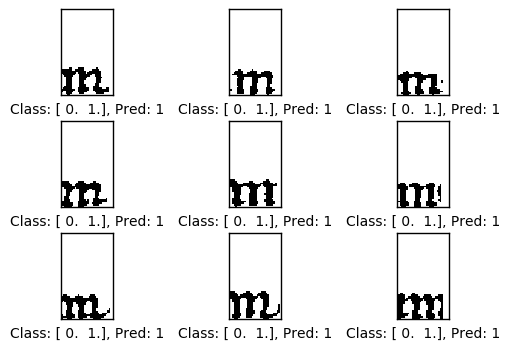


Example of incorrect predictions for char: M


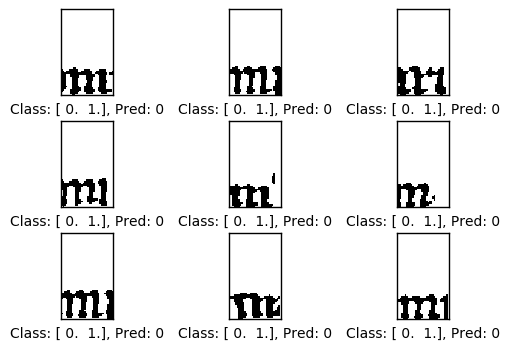

[[391  42]
 [ 52 165]]


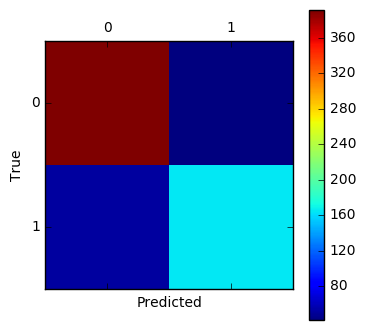


---- END ANALISYS FOR CHAR M
 ----
Trovati 1950 esempi positivi per il carattere N .
Campioni di training: 1671 	Campioni di test: 279
Richiesti 3900 esempi negativi: trovati 3900 generici.
Numero totale di campioni di training: 5013
Numero totale di campioni di test: 837

---- START ANALISYS FOR CHAR N ----

Start TRAINING for char N
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 26 epoch(s)
Training model 2 ...
Not pre-processing 31 epoch(s)
Training model 3 ...
Not pre-processing 40 epoch(s)
Training model 4 ...
Not pre-processing 28 epoch(s)
Done.



The TRAINING lasted 4272.36 seconds
History: 


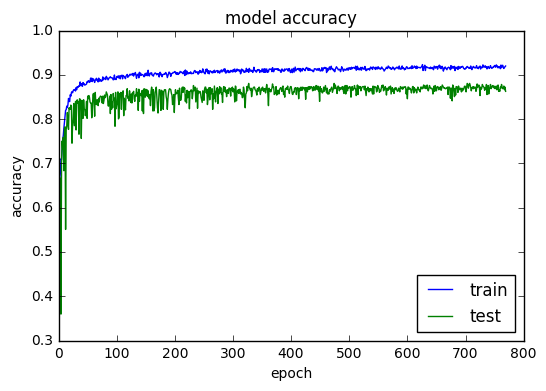

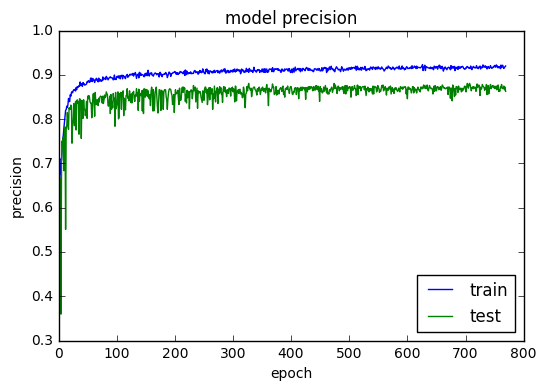

Continuation of training with no pre-processing:


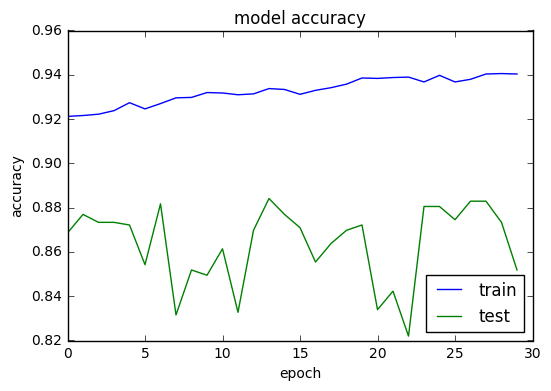

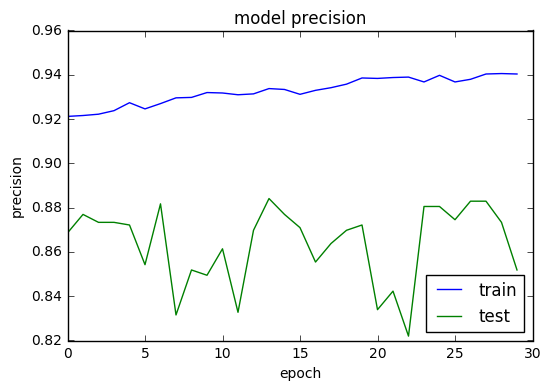

X shape: (837, 34, 56, 1)
837 samples
Evaluating ensemble
837/837 [==============================] - 3s     
Test accuracy: 88.4109916439 %
Test error: 11.5890083561 %
832/837 [============================>.] - ETA: 0s
Example of correct predictions for char: N


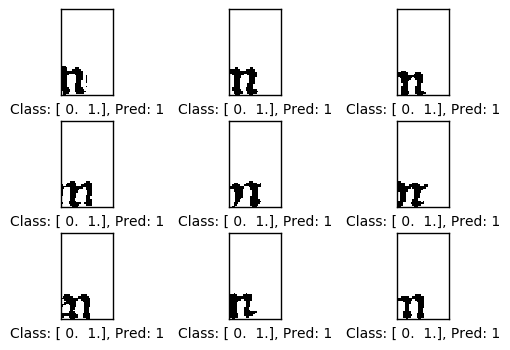


Example of incorrect predictions for char: N


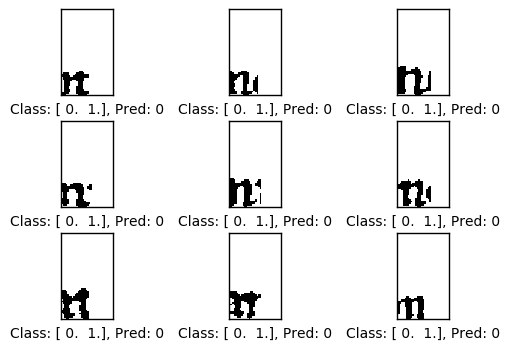

[[507  51]
 [ 46 233]]


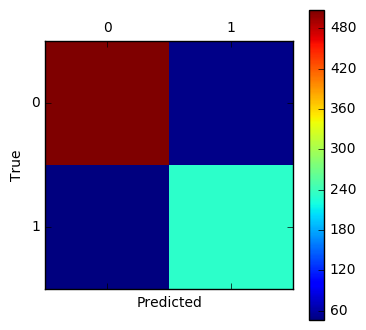


---- END ANALISYS FOR CHAR N
 ----
Trovati 711 esempi positivi per il carattere O .
Campioni di training: 609 	Campioni di test: 102
Richiesti 1422 esempi negativi: trovati 1422 generici.
Numero totale di campioni di training: 1827
Numero totale di campioni di test: 306

---- START ANALISYS FOR CHAR O ----

Start TRAINING for char O
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 21 epoch(s)
Training model 2 ...
Not pre-processing 39 epoch(s)
Training model 3 ...
Not pre-processing 45 epoch(s)
Training model 4 ...
Not pre-processing 21 epoch(s)
Done.



The TRAINING lasted 1573.13 seconds
History: 


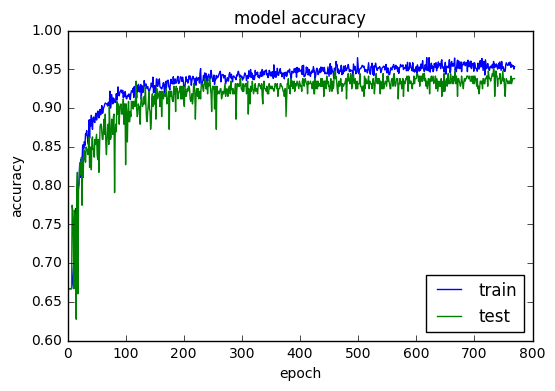

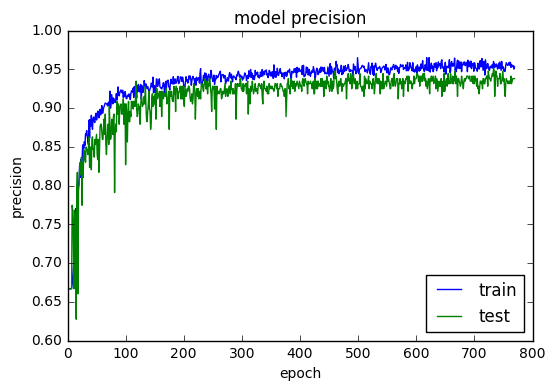

Continuation of training with no pre-processing:


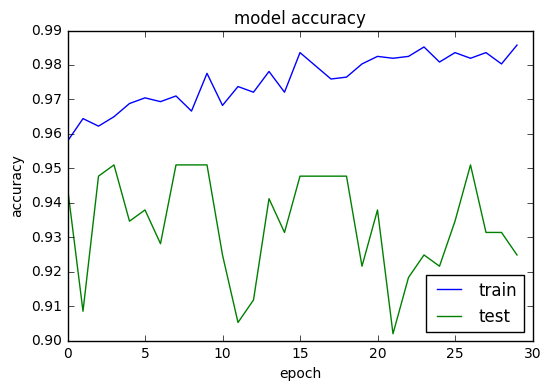

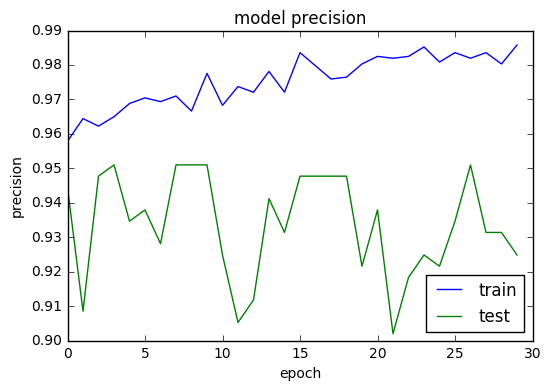

X shape: (306, 34, 56, 1)
306 samples
Evaluating ensemble
306/306 [==============================] - 3s     
Test accuracy: 95.4248366013 %
Test error: 4.57516339869 %
306/306 [==============================] - 2s     

Example of correct predictions for char: O


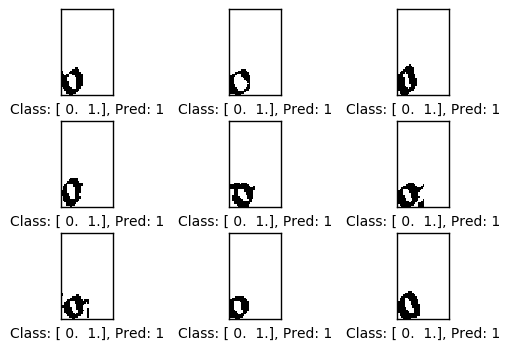


Example of incorrect predictions for char: O


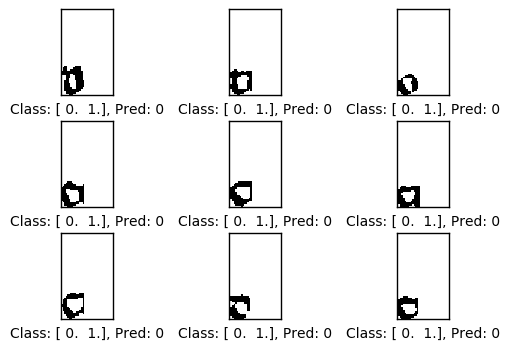

[[200   4]
 [ 10  92]]


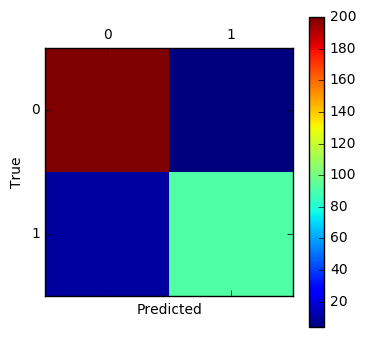


---- END ANALISYS FOR CHAR O
 ----
Trovati 309 esempi positivi per il carattere R .
Campioni di training: 264 	Campioni di test: 45
Richiesti 618 esempi negativi: trovati 618 generici.
Numero totale di campioni di training: 793
Numero totale di campioni di test: 134

---- START ANALISYS FOR CHAR R ----

Start TRAINING for char R
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 16 epoch(s)
Training model 2 ...
Not pre-processing 31 epoch(s)
Training model 3 ...
Not pre-processing 18 epoch(s)
Training model 4 ...
Not pre-processing 27 epoch(s)
Done.



The TRAINING lasted 761.17 seconds
History: 


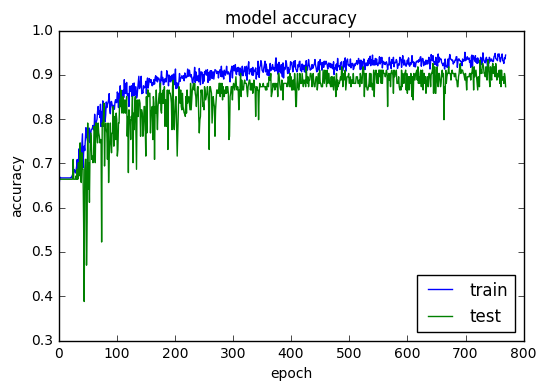

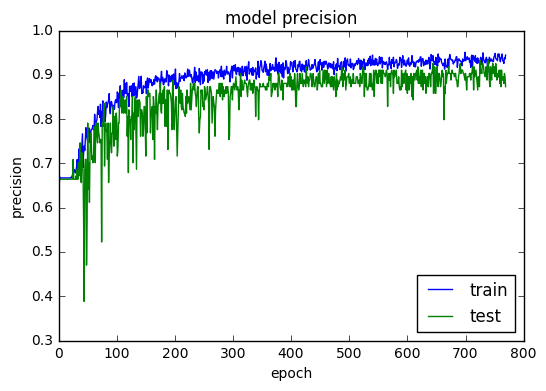

Continuation of training with no pre-processing:


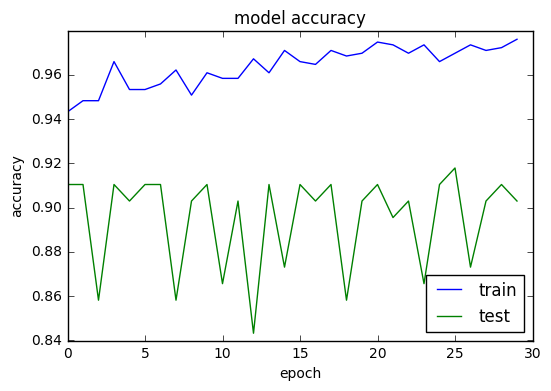

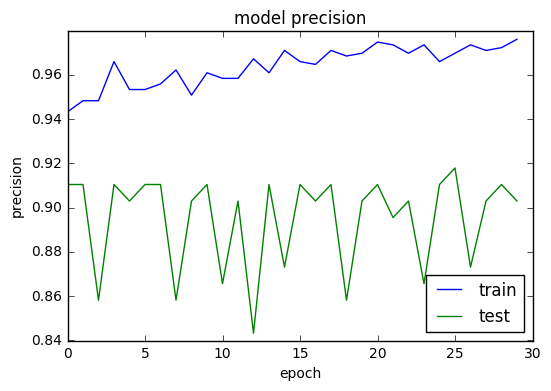

X shape: (134, 34, 56, 1)
134 samples
Evaluating ensemble
128/134 [===========================>..] - ETA: 0sTest accuracy: 91.7910447761 %
Test error: 8.20895522388 %
128/134 [===========================>..] - ETA: 0s
Example of correct predictions for char: R


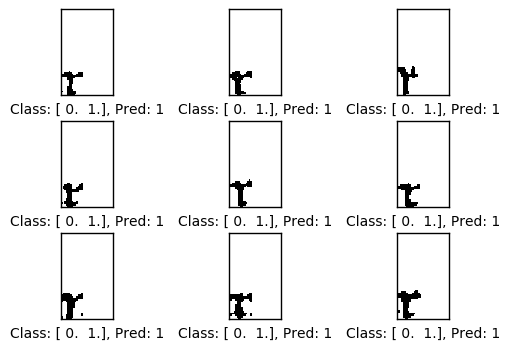


Example of incorrect predictions for char: R


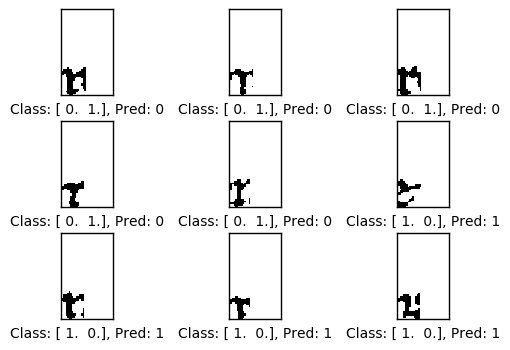

[[83  6]
 [ 5 40]]


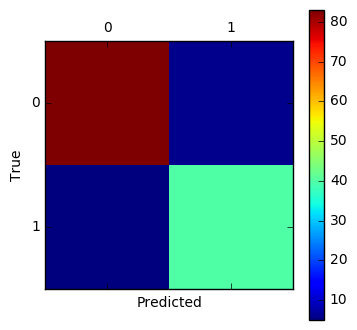


---- END ANALISYS FOR CHAR R
 ----
Trovati 100 esempi positivi per il carattere S_MEDIANA .
Campioni di training: 85 	Campioni di test: 15
Richiesti 200 esempi negativi: trovati 200 generici.
Numero totale di campioni di training: 256
Numero totale di campioni di test: 44

---- START ANALISYS FOR CHAR S_MEDIANA ----

Start TRAINING for char S_MEDIANA
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 48 epoch(s)
Training model 2 ...
Not pre-processing 43 epoch(s)
Training model 3 ...
Not pre-processing 43 epoch(s)
Training model 4 ...
Not pre-processing 43 epoch(s)
Done.



The TRAINING lasted 271.68 seconds
History: 


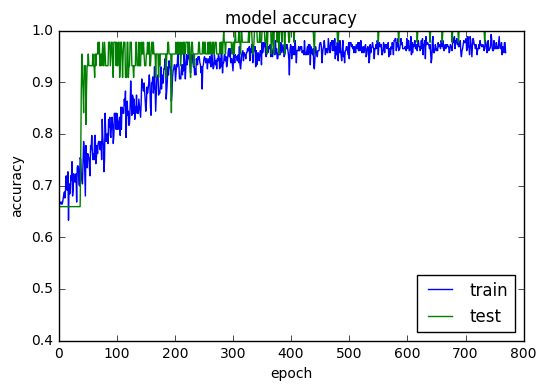

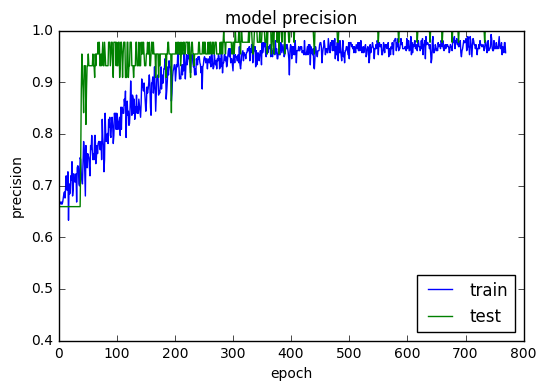

Continuation of training with no pre-processing:


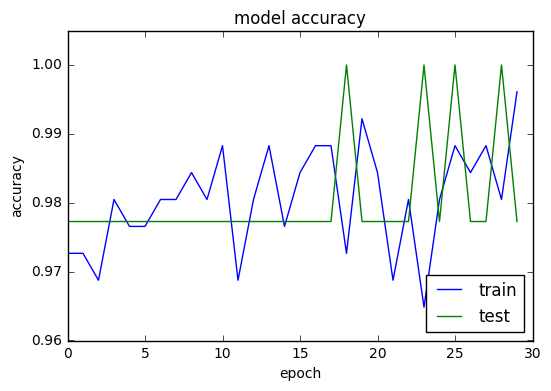

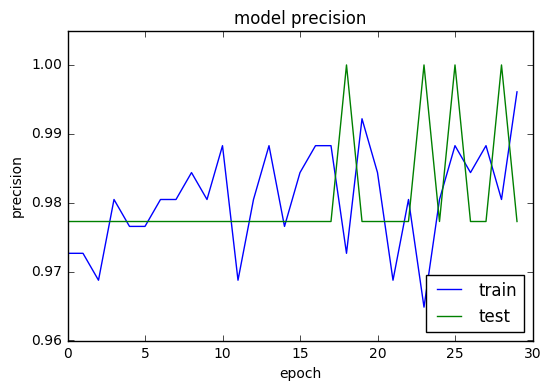

X shape: (44, 34, 56, 1)
44 samples
Evaluating ensemble
44/44 [==============================] - 3s     
Test accuracy: 100.0 %
Test error: 0.0 %
44/44 [==============================] - 3s     

Example of correct predictions for char: S_MEDIANA


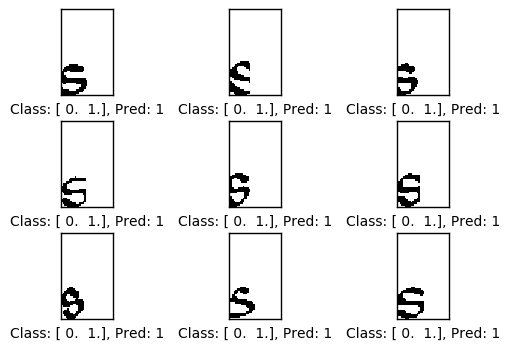


Example of incorrect predictions for char: S_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[29  0]
 [ 0 15]]


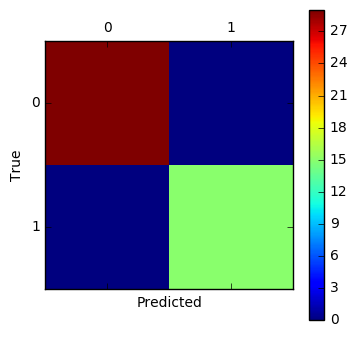


---- END ANALISYS FOR CHAR S_MEDIANA
 ----
Trovati 1530 esempi positivi per il carattere T .
Campioni di training: 1311 	Campioni di test: 219
Richiesti 3060 esempi negativi: trovati 3060 generici.
Numero totale di campioni di training: 3933
Numero totale di campioni di test: 657

---- START ANALISYS FOR CHAR T ----

Start TRAINING for char T
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 49 epoch(s)
Training model 2 ...
Not pre-processing 12 epoch(s)
Training model 3 ...
Not pre-processing 32 epoch(s)
Training model 4 ...
Not pre-processing 29 epoch(s)
Done.



The TRAINING lasted 3309.35 seconds
History: 


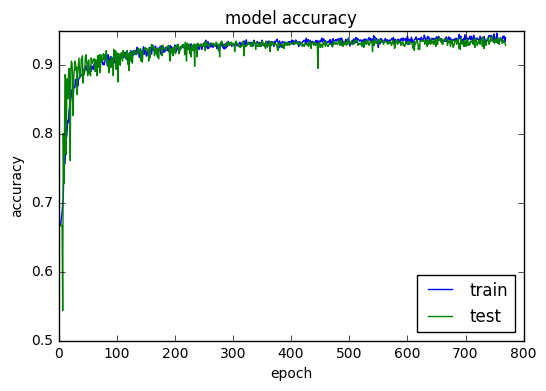

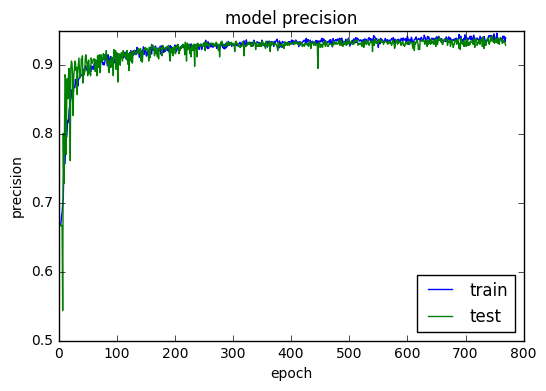

Continuation of training with no pre-processing:


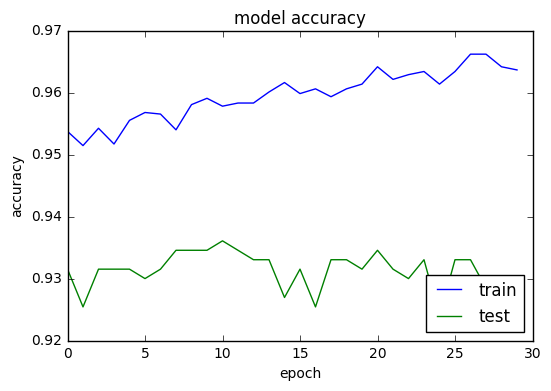

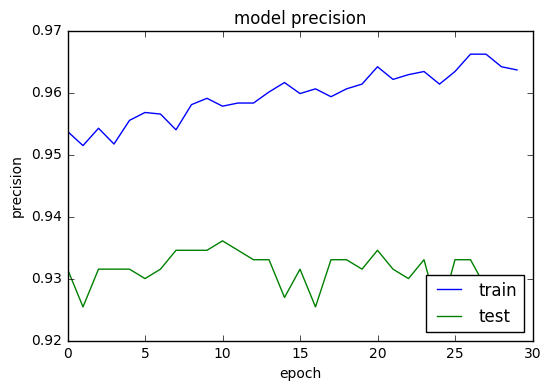

X shape: (657, 34, 56, 1)
657 samples
Evaluating ensemble
657/657 [==============================] - 4s     
Test accuracy: 94.0639269497 %
Test error: 5.93607305029 %
657/657 [==============================] - 3s     

Example of correct predictions for char: T


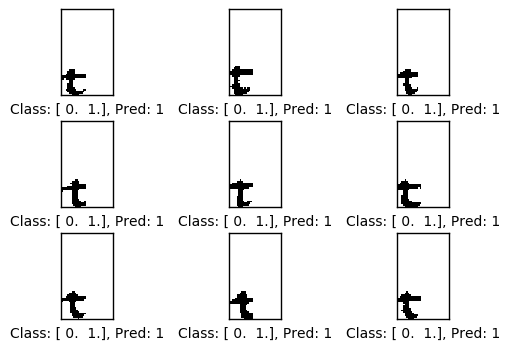


Example of incorrect predictions for char: T


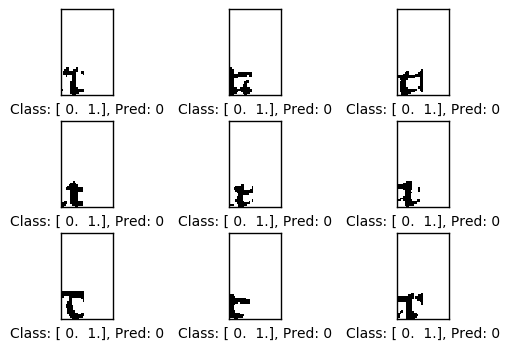

[[408  30]
 [  9 210]]


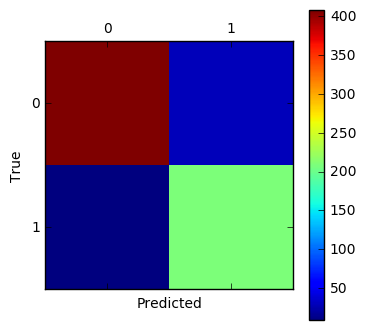


---- END ANALISYS FOR CHAR T
 ----
Trovati 1146 esempi positivi per il carattere U .
Campioni di training: 982 	Campioni di test: 164
Richiesti 2292 esempi negativi: trovati 2292 generici.
Numero totale di campioni di training: 2946
Numero totale di campioni di test: 492

---- START ANALISYS FOR CHAR U ----

Start TRAINING for char U
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 38 epoch(s)
Training model 2 ...
Not pre-processing 33 epoch(s)
Training model 3 ...
Not pre-processing 47 epoch(s)
Training model 4 ...
Not pre-processing 25 epoch(s)
Done.



The TRAINING lasted 5400.53 seconds
History: 


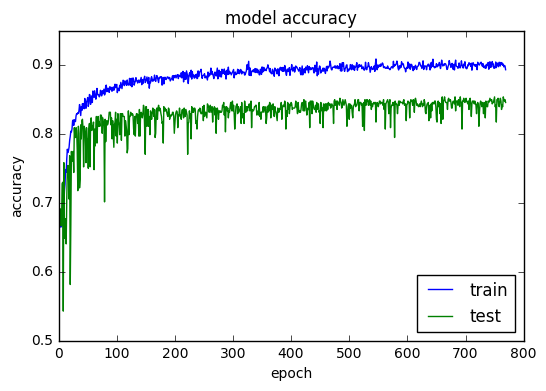

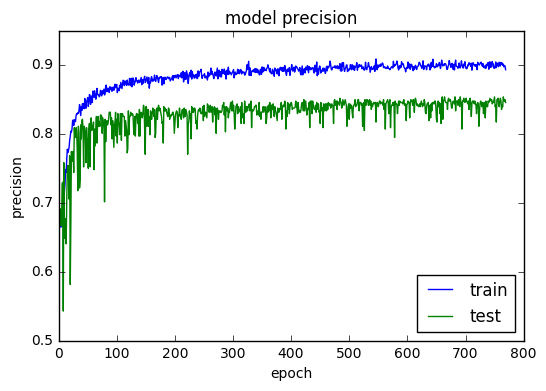

Continuation of training with no pre-processing:


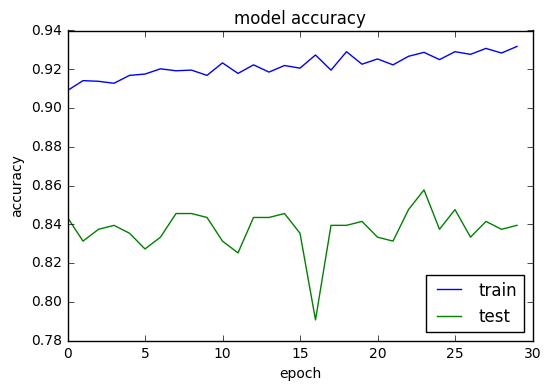

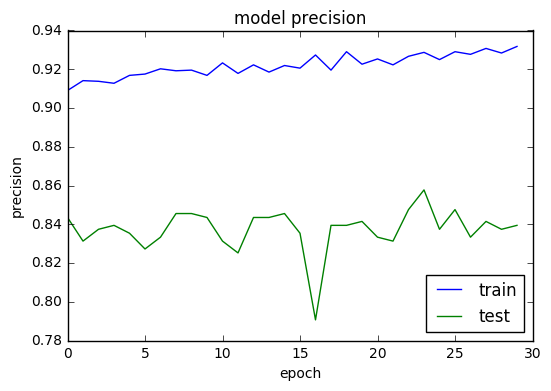

X shape: (492, 34, 56, 1)
492 samples
Evaluating ensemble
492/492 [==============================] - 4s     
Test accuracy: 85.569105788 %
Test error: 14.4308943574 %
492/492 [==============================] - 3s     

Example of correct predictions for char: U


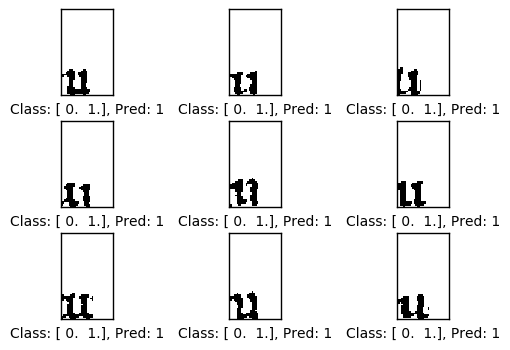


Example of incorrect predictions for char: U


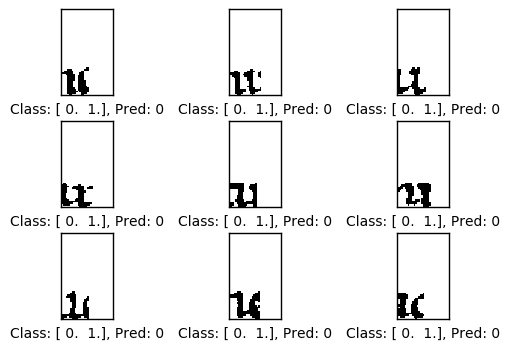

[[285  43]
 [ 28 136]]


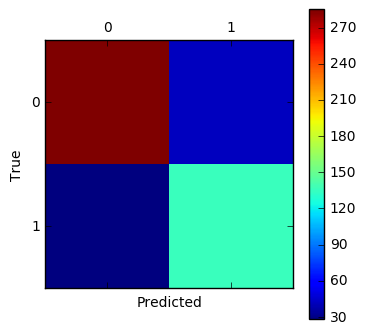


---- END ANALISYS FOR CHAR U
 ----
Trovati 599 esempi positivi per il carattere D_ALTA .
Campioni di training: 513 	Campioni di test: 86
Richiesti 1198 esempi negativi: trovati 1198 generici.
Numero totale di campioni di training: 1539
Numero totale di campioni di test: 258

---- START ANALISYS FOR CHAR D_ALTA ----

Start TRAINING for char D_ALTA
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 13 epoch(s)
Training model 2 ...
Not pre-processing 47 epoch(s)
Training model 3 ...
Not pre-processing 33 epoch(s)
Training model 4 ...
Not pre-processing 35 epoch(s)
Done.



The TRAINING lasted 2261.41 seconds
History: 


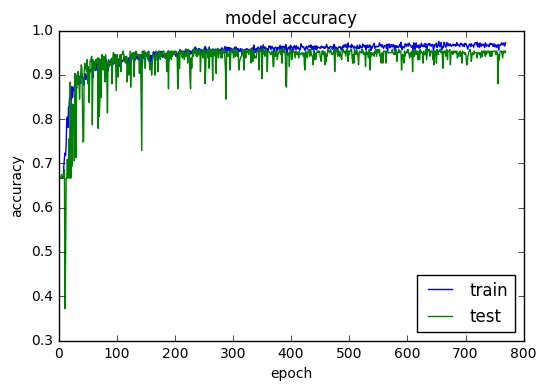

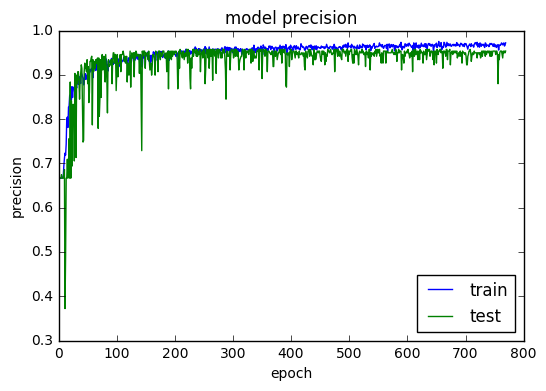

Continuation of training with no pre-processing:


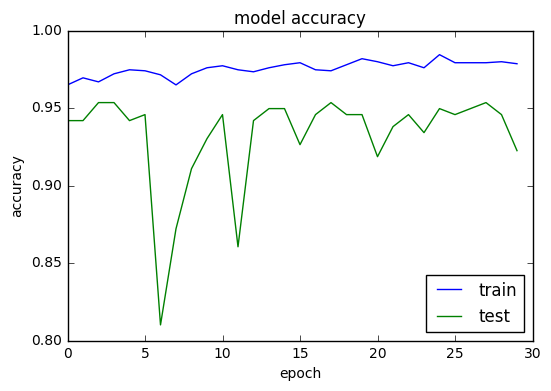

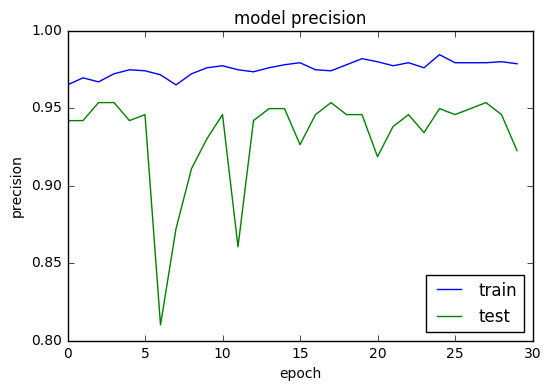

X shape: (258, 34, 56, 1)
258 samples
Evaluating ensemble
256/258 [============================>.] - ETA: 0sTest accuracy: 95.7364341085 %
Test error: 4.26356589147 %
256/258 [============================>.] - ETA: 0s
Example of correct predictions for char: D_ALTA


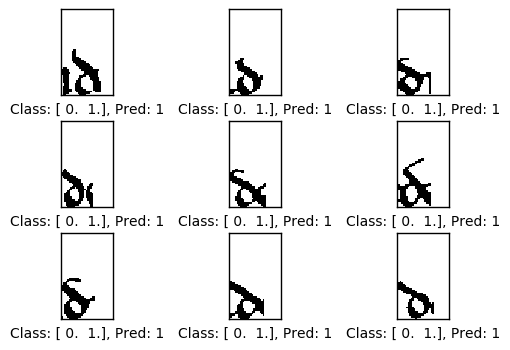


Example of incorrect predictions for char: D_ALTA


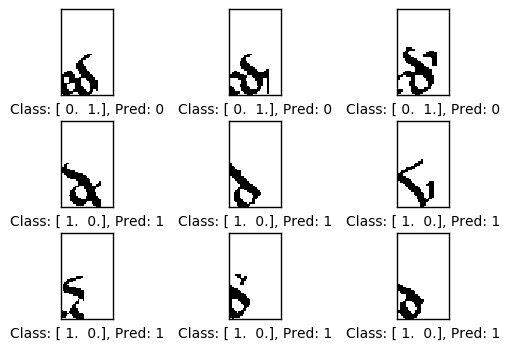

[[164   8]
 [  3  83]]


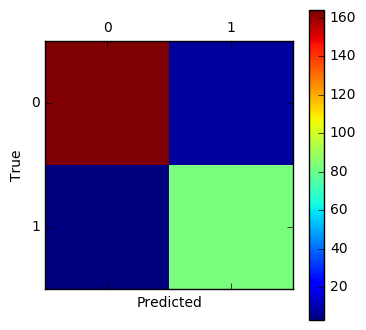


---- END ANALISYS FOR CHAR D_ALTA
 ----
Trovati 796 esempi positivi per il carattere S_ALTA .
Campioni di training: 682 	Campioni di test: 114
Richiesti 1592 esempi negativi: trovati 1592 generici.
Numero totale di campioni di training: 2046
Numero totale di campioni di test: 342

---- START ANALISYS FOR CHAR S_ALTA ----

Start TRAINING for char S_ALTA
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 16 epoch(s)
Training model 2 ...
Not pre-processing 26 epoch(s)
Training model 3 ...
Not pre-processing 14 epoch(s)
Training model 4 ...
Not pre-processing 31 epoch(s)
Done.



The TRAINING lasted 1786.16 seconds
History: 


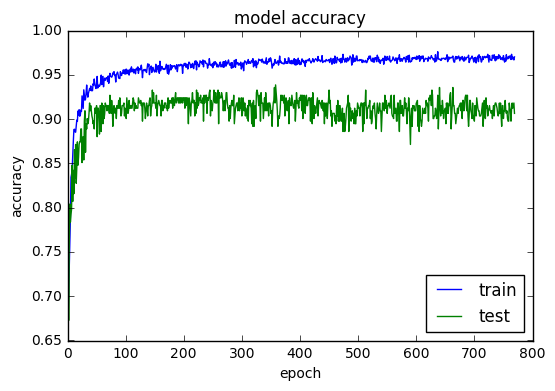

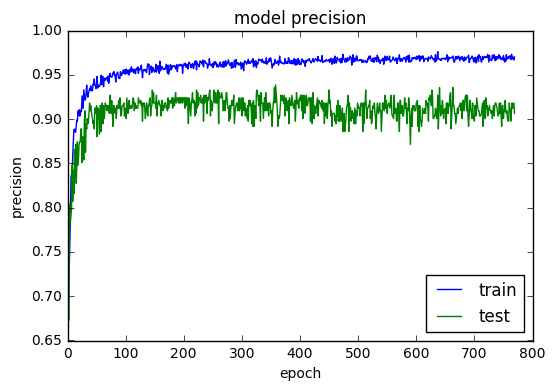

Continuation of training with no pre-processing:


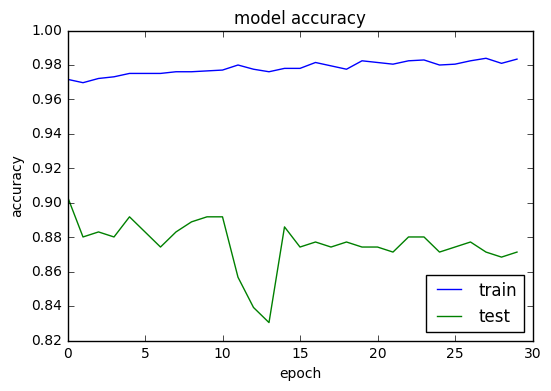

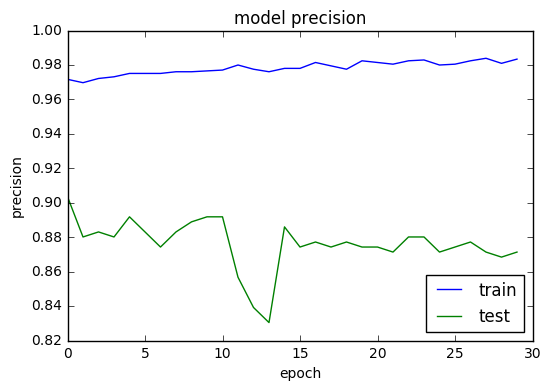

X shape: (342, 34, 56, 1)
342 samples
Evaluating ensemble
342/342 [==============================] - 4s     
Test accuracy: 92.6900587584 %
Test error: 7.30994162504 %
342/342 [==============================] - 3s     

Example of correct predictions for char: S_ALTA


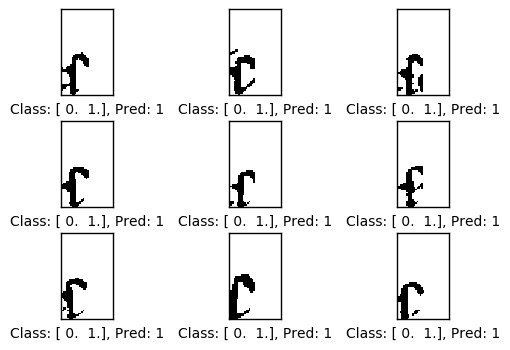


Example of incorrect predictions for char: S_ALTA


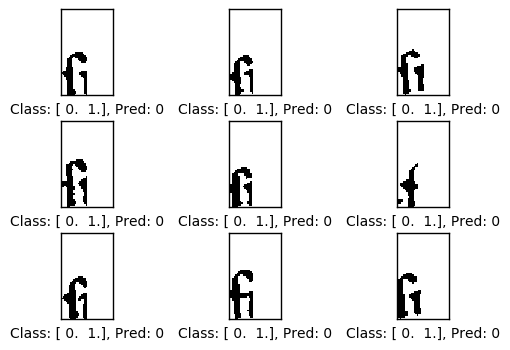

[[215  13]
 [ 12 102]]


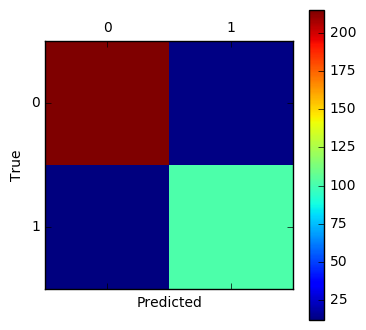


---- END ANALISYS FOR CHAR S_ALTA
 ----
Trovati 554 esempi positivi per il carattere B .
Campioni di training: 474 	Campioni di test: 80
Richiesti 1108 esempi negativi: trovati 1108 generici.
Numero totale di campioni di training: 1423
Numero totale di campioni di test: 239

---- START ANALISYS FOR CHAR B ----

Start TRAINING for char B
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 16 epoch(s)
Training model 2 ...
Not pre-processing 16 epoch(s)
Training model 3 ...
Not pre-processing 16 epoch(s)
Training model 4 ...
Not pre-processing 16 epoch(s)
Done.



The TRAINING lasted 1515.81 seconds
History: 


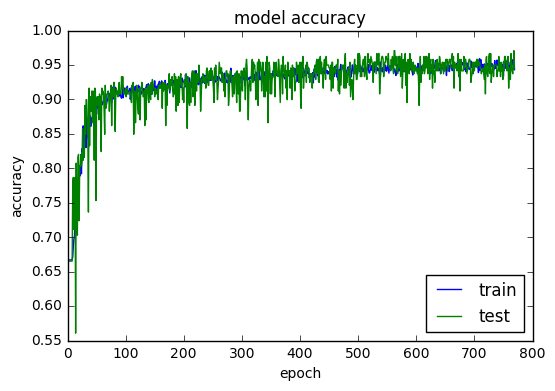

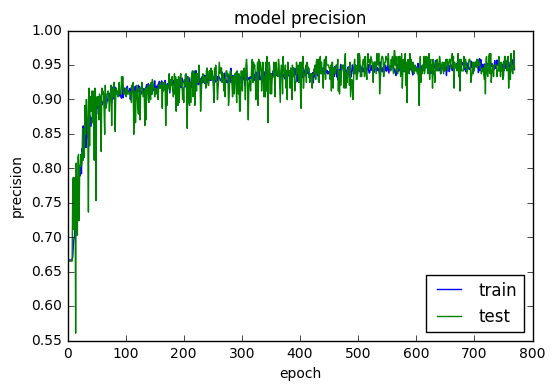

Continuation of training with no pre-processing:


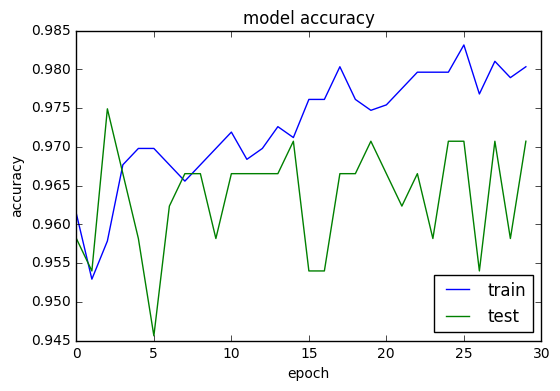

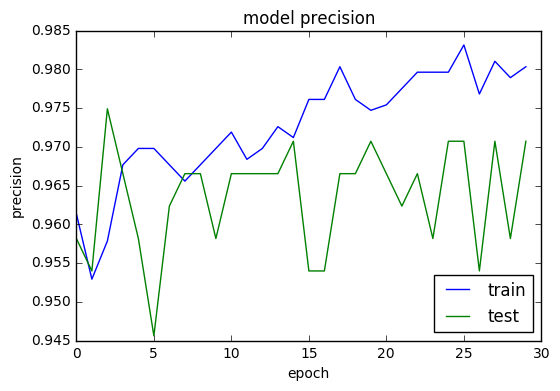

X shape: (239, 34, 56, 1)
239 samples
Evaluating ensemble
239/239 [==============================] - 4s     
Test accuracy: 97.0711301061 %
Test error: 2.92887026795 %
239/239 [==============================] - 3s     

Example of correct predictions for char: B


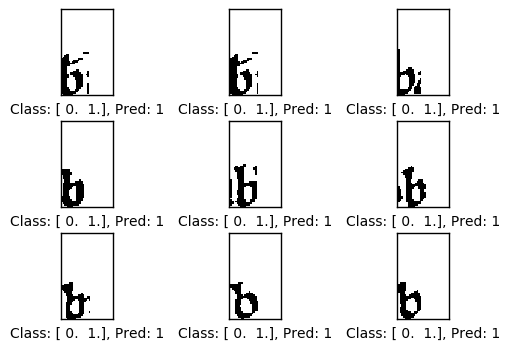


Example of incorrect predictions for char: B

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[153   6]
 [  1  79]]


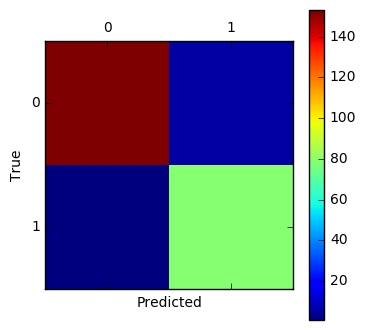


---- END ANALISYS FOR CHAR B
 ----
Trovati 140 esempi positivi per il carattere F .
Campioni di training: 120 	Campioni di test: 20
Richiesti 280 esempi negativi: trovati 280 generici.
Numero totale di campioni di training: 360
Numero totale di campioni di test: 60

---- START ANALISYS FOR CHAR F ----

Start TRAINING for char F
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 29 epoch(s)
Training model 2 ...
Not pre-processing 21 epoch(s)
Training model 3 ...
Not pre-processing 19 epoch(s)
Training model 4 ...
Not pre-processing 24 epoch(s)
Done.



The TRAINING lasted 400.63 seconds
History: 


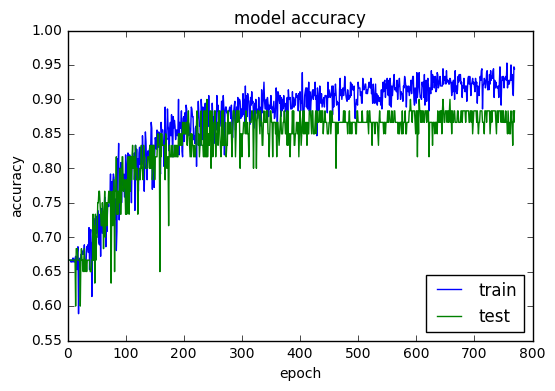

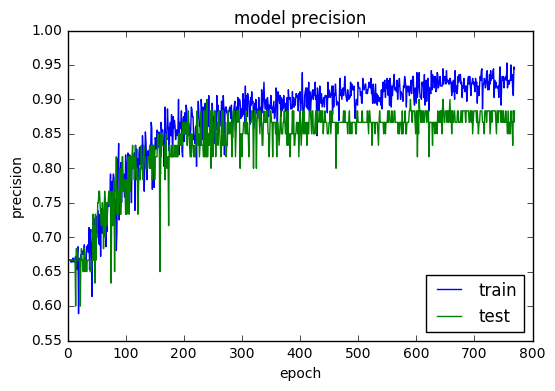

Continuation of training with no pre-processing:


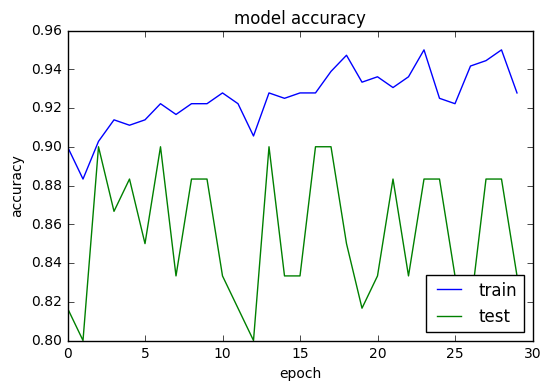

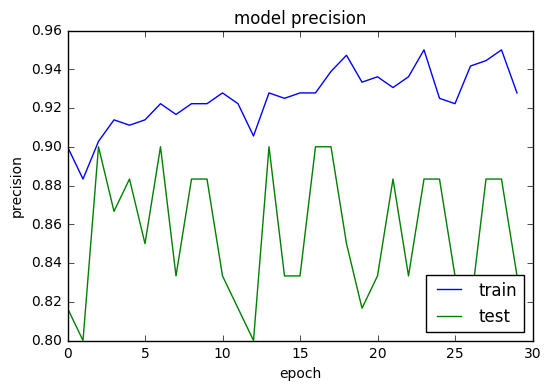

X shape: (60, 34, 56, 1)
60 samples
Evaluating ensemble
60/60 [==============================] - 4s     
Test accuracy: 90.0000015895 %
Test error: 10.0000011921 %
60/60 [==============================] - 3s     

Example of correct predictions for char: F


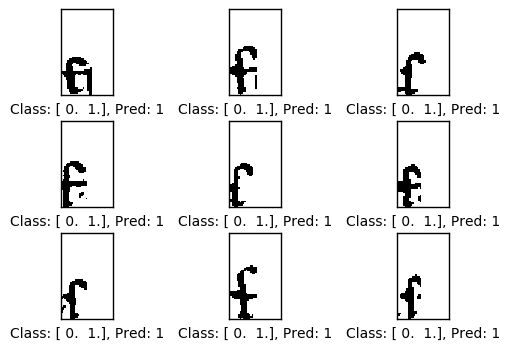


Example of incorrect predictions for char: F

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[37  3]
 [ 3 17]]


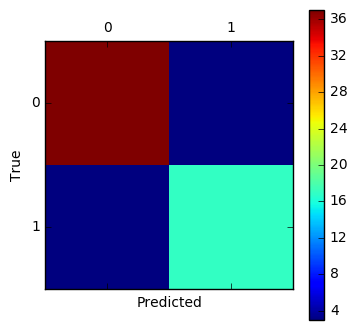


---- END ANALISYS FOR CHAR F
 ----
Trovati 123 esempi positivi per il carattere H .
Campioni di training: 105 	Campioni di test: 18
Richiesti 246 esempi negativi: trovati 246 generici.
Numero totale di campioni di training: 315
Numero totale di campioni di test: 54

---- START ANALISYS FOR CHAR H ----

Start TRAINING for char H
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 23 epoch(s)
Training model 2 ...
Not pre-processing 20 epoch(s)
Training model 3 ...
Not pre-processing 41 epoch(s)
Training model 4 ...
Not pre-processing 25 epoch(s)
Done.



The TRAINING lasted 385.13 seconds
History: 


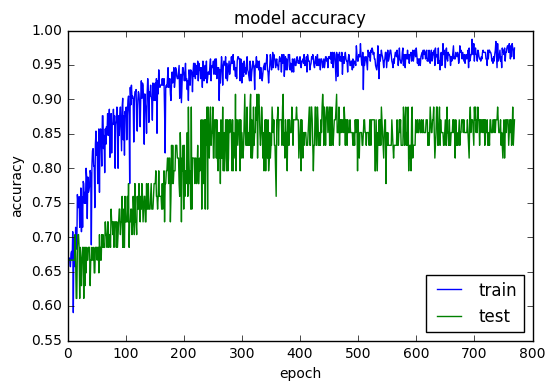

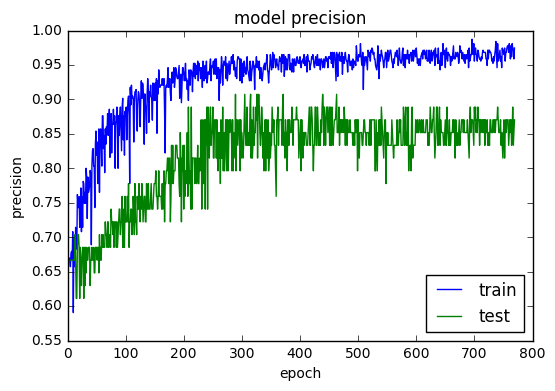

Continuation of training with no pre-processing:


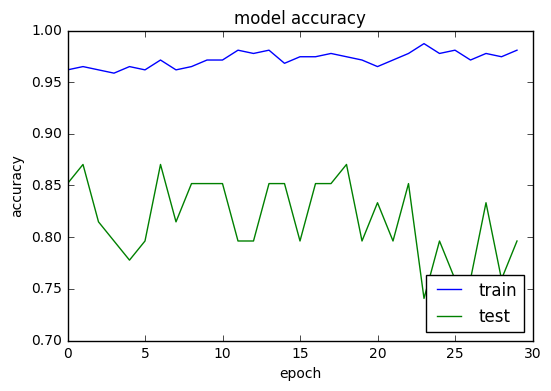

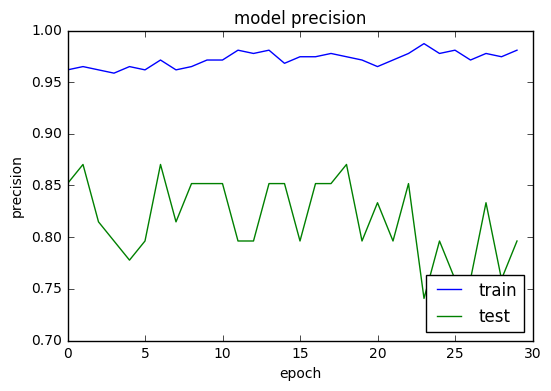

X shape: (54, 34, 56, 1)
54 samples
Evaluating ensemble
54/54 [==============================] - 4s     
Test accuracy: 85.1851856267 %
Test error: 14.8148143733 %
54/54 [==============================] - 3s     

Example of correct predictions for char: H


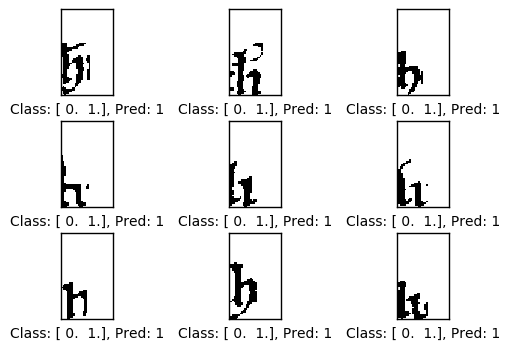


Example of incorrect predictions for char: H

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[33  3]
 [ 5 13]]


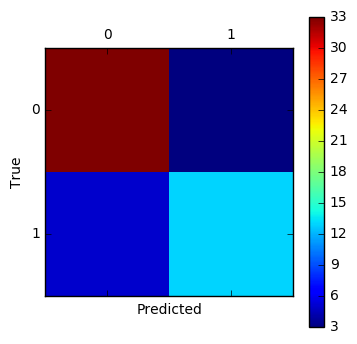


---- END ANALISYS FOR CHAR H
 ----
Trovati 390 esempi positivi per il carattere L .
Campioni di training: 334 	Campioni di test: 56
Richiesti 780 esempi negativi: trovati 780 generici.
Numero totale di campioni di training: 1002
Numero totale di campioni di test: 168

---- START ANALISYS FOR CHAR L ----

Start TRAINING for char L
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 37 epoch(s)
Training model 2 ...
Not pre-processing 13 epoch(s)
Training model 3 ...
Not pre-processing 44 epoch(s)
Training model 4 ...
Not pre-processing 32 epoch(s)
Done.



The TRAINING lasted 965.13 seconds
History: 


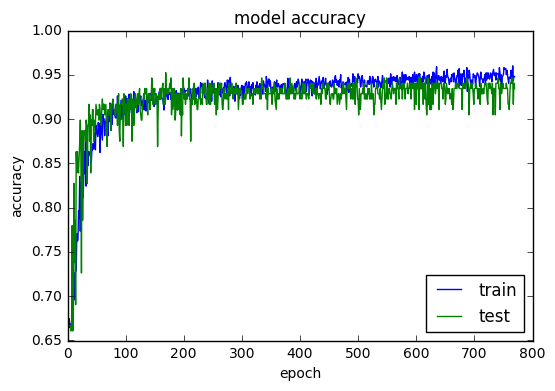

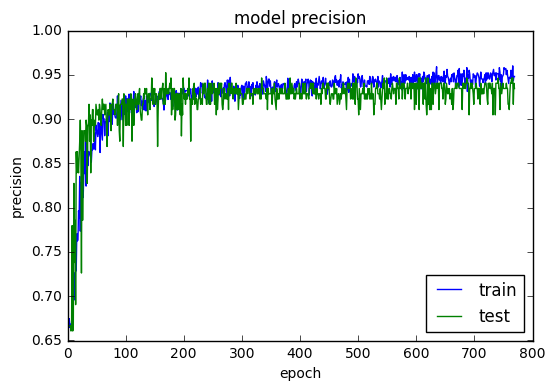

Continuation of training with no pre-processing:


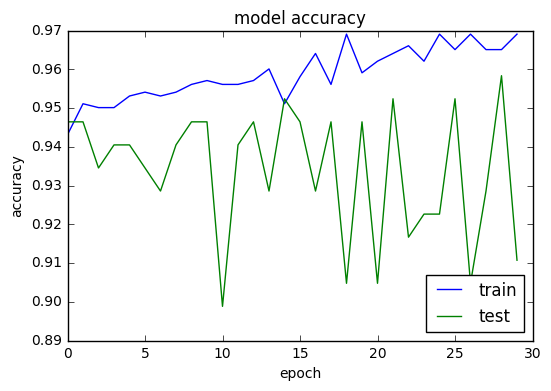

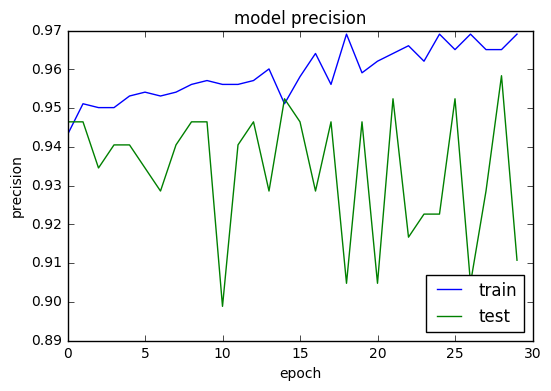

X shape: (168, 34, 56, 1)
168 samples
Evaluating ensemble
168/168 [==============================] - 4s     
Test accuracy: 94.0476190476 %
Test error: 5.95238095238 %
168/168 [==============================] - 4s     

Example of correct predictions for char: L


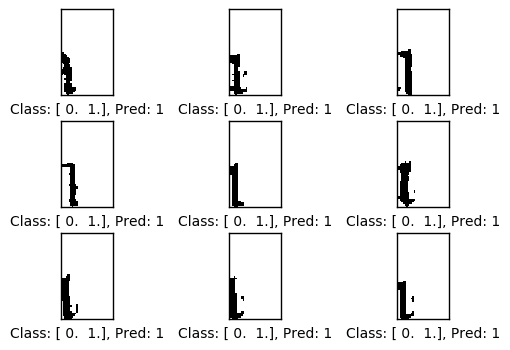


Example of incorrect predictions for char: L


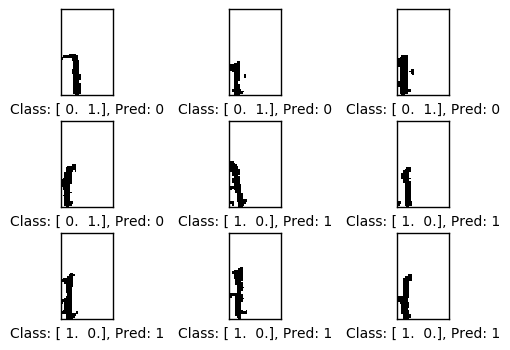

[[106   6]
 [  4  52]]


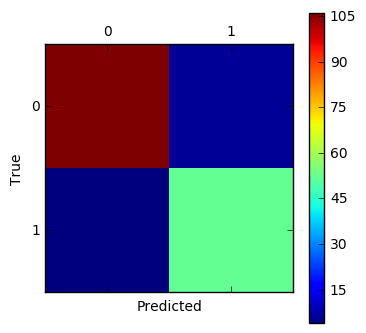


---- END ANALISYS FOR CHAR L
 ----
Trovati 347 esempi positivi per il carattere G .
Campioni di training: 297 	Campioni di test: 50
Richiesti 694 esempi negativi: trovati 694 generici.
Numero totale di campioni di training: 891
Numero totale di campioni di test: 150

---- START ANALISYS FOR CHAR G ----

Start TRAINING for char G
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 13 epoch(s)
Training model 2 ...
Not pre-processing 40 epoch(s)
Training model 3 ...
Not pre-processing 25 epoch(s)
Training model 4 ...
Not pre-processing 25 epoch(s)
Done.



The TRAINING lasted 892.25 seconds
History: 


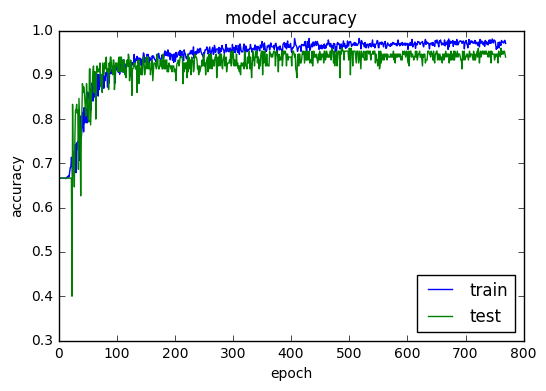

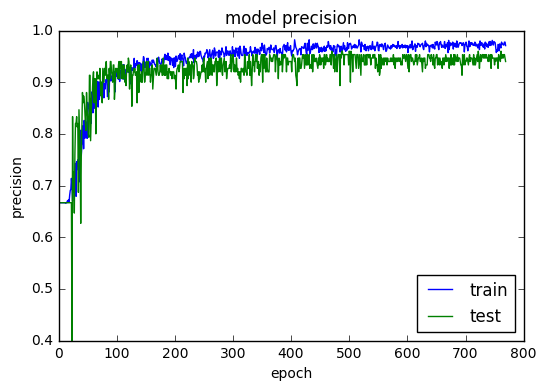

Continuation of training with no pre-processing:


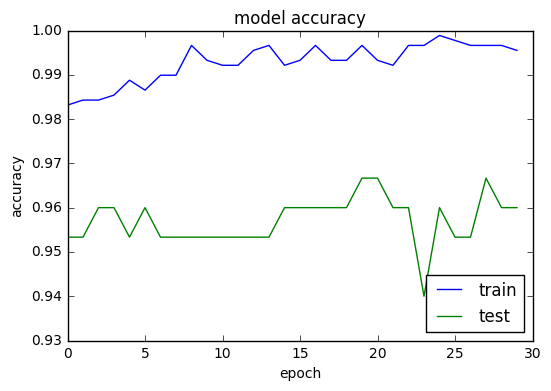

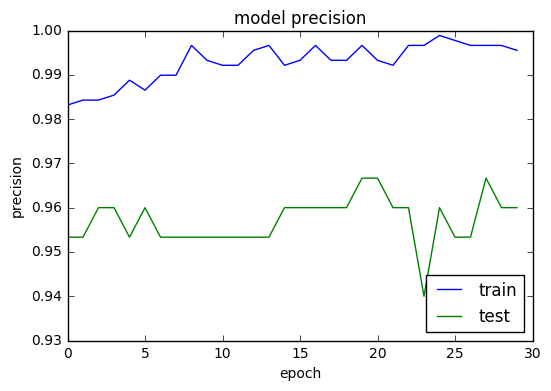

X shape: (150, 34, 56, 1)
150 samples
Evaluating ensemble
150/150 [==============================] - 5s     
Test accuracy: 95.3333333333 %
Test error: 4.66666666667 %
150/150 [==============================] - 4s     

Example of correct predictions for char: G


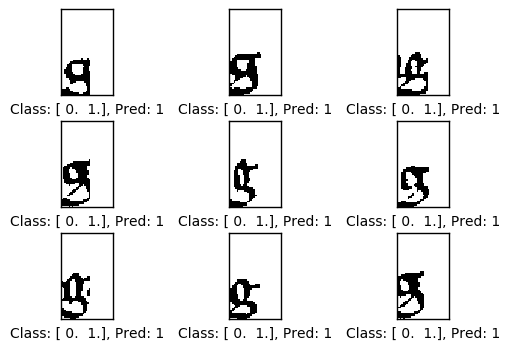


Example of incorrect predictions for char: G

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[95  5]
 [ 2 48]]


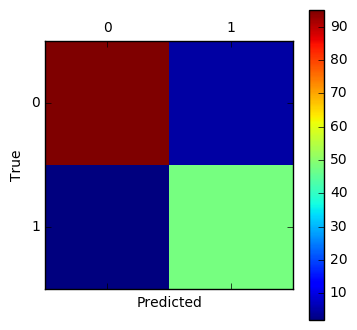


---- END ANALISYS FOR CHAR G
 ----
Trovati 1255 esempi positivi per il carattere P .
Campioni di training: 1075 	Campioni di test: 180
Richiesti 2510 esempi negativi: trovati 2510 generici.
Numero totale di campioni di training: 3226
Numero totale di campioni di test: 539

---- START ANALISYS FOR CHAR P ----

Start TRAINING for char P
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 38 epoch(s)
Training model 2 ...
Not pre-processing 39 epoch(s)
Training model 3 ...
Not pre-processing 31 epoch(s)
Training model 4 ...
Not pre-processing 36 epoch(s)
Done.



The TRAINING lasted 3414.54 seconds
History: 


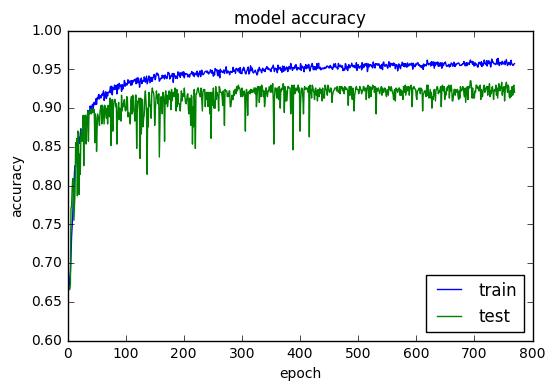

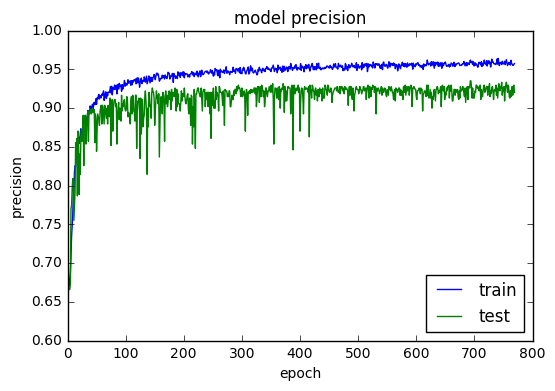

Continuation of training with no pre-processing:


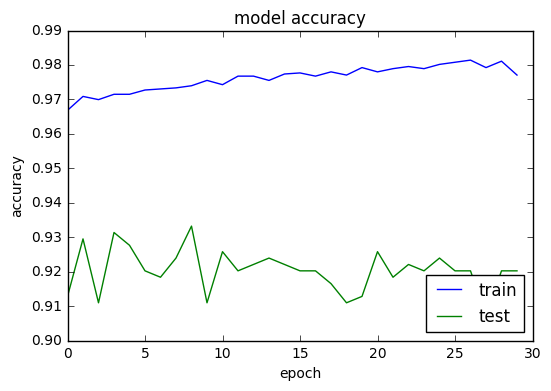

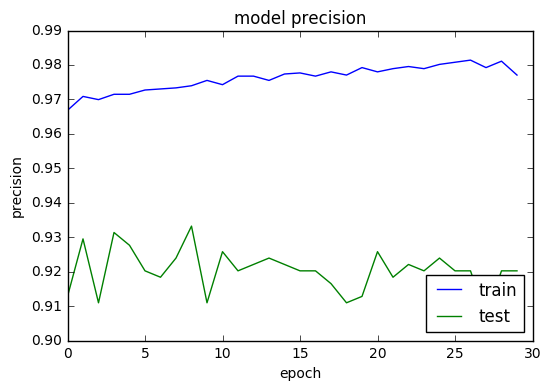

X shape: (539, 34, 56, 1)
539 samples
Evaluating ensemble
539/539 [==============================] - 5s     
Test accuracy: 93.692022186 %
Test error: 6.30797781396 %
539/539 [==============================] - 4s     

Example of correct predictions for char: P


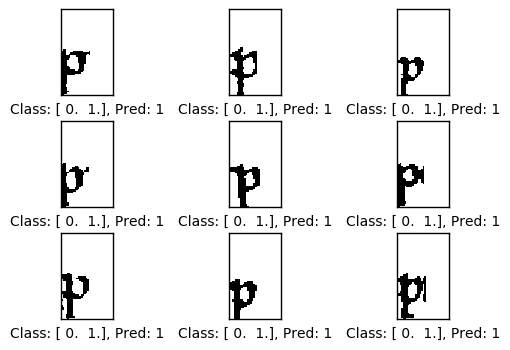


Example of incorrect predictions for char: P


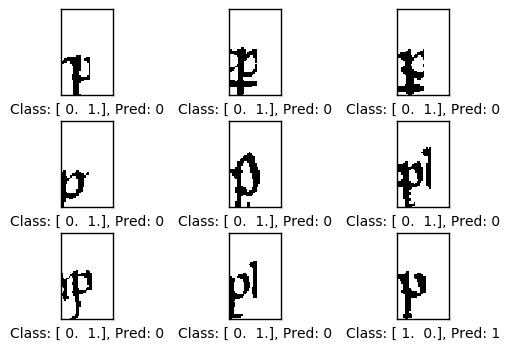

[[333  26]
 [  8 172]]


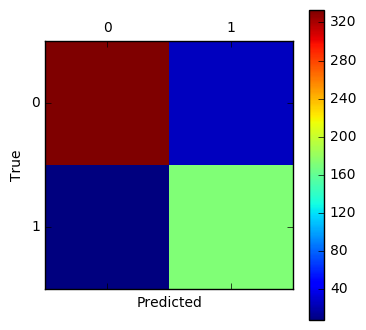


---- END ANALISYS FOR CHAR P
 ----
Trovati 460 esempi positivi per il carattere Q .
Campioni di training: 394 	Campioni di test: 66
Richiesti 920 esempi negativi: trovati 920 generici.
Numero totale di campioni di training: 1182
Numero totale di campioni di test: 198

---- START ANALISYS FOR CHAR Q ----

Start TRAINING for char Q
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 31 epoch(s)
Training model 2 ...
Not pre-processing 25 epoch(s)
Training model 3 ...
Not pre-processing 11 epoch(s)
Training model 4 ...
Not pre-processing 47 epoch(s)
Done.



The TRAINING lasted 1296.51 seconds
History: 


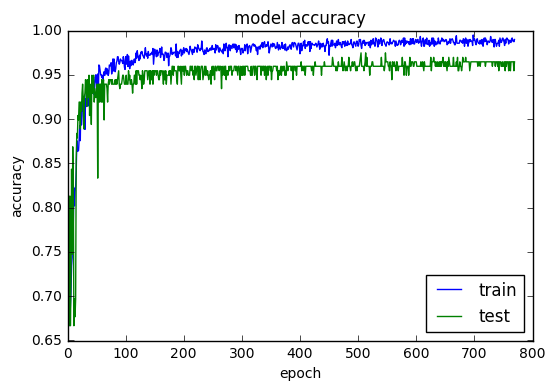

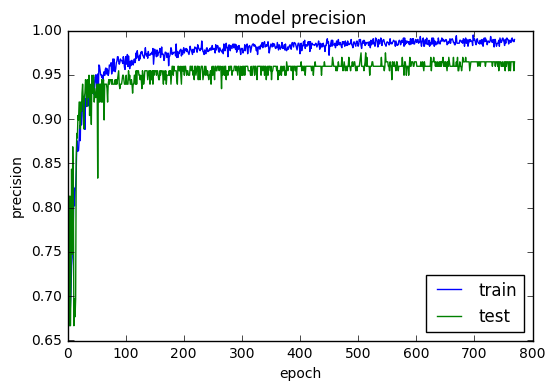

Continuation of training with no pre-processing:


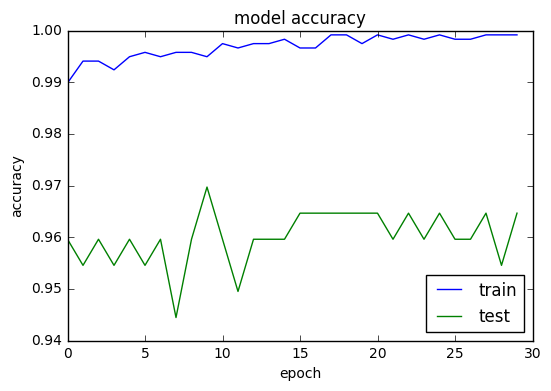

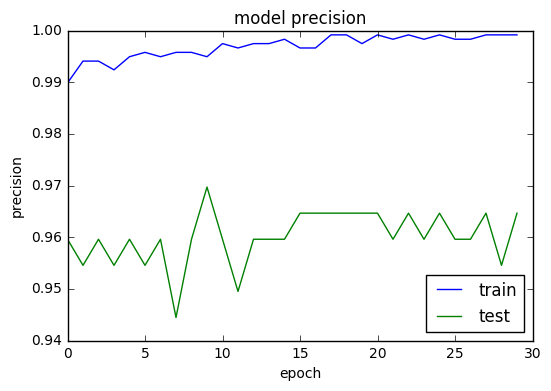

X shape: (198, 34, 56, 1)
198 samples
Evaluating ensemble
198/198 [==============================] - 5s     
Test accuracy: 96.9696969697 %
Test error: 3.0303030303 %
198/198 [==============================] - 4s     

Example of correct predictions for char: Q


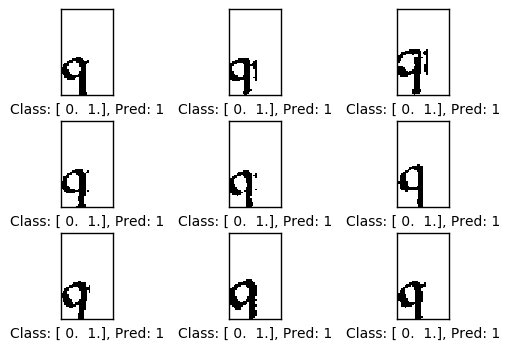


Example of incorrect predictions for char: Q

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[131   1]
 [  5  61]]


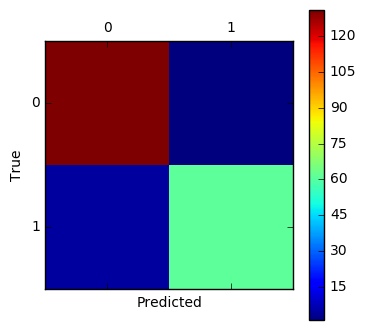


---- END ANALISYS FOR CHAR Q
 ----
Trovati 335 esempi positivi per il carattere S_BASSA .
Campioni di training: 287 	Campioni di test: 48
Richiesti 670 esempi negativi: trovati 670 generici.
Numero totale di campioni di training: 861
Numero totale di campioni di test: 144

---- START ANALISYS FOR CHAR S_BASSA ----

Start TRAINING for char S_BASSA
Training model 0 ...
Not pre-processing 30 epoch(s)
Training model 1 ...
Not pre-processing 28 epoch(s)
Training model 2 ...
Not pre-processing 22 epoch(s)
Training model 3 ...
Not pre-processing 38 epoch(s)
Training model 4 ...
Not pre-processing 13 epoch(s)
Done.



The TRAINING lasted 933.39 seconds
History: 


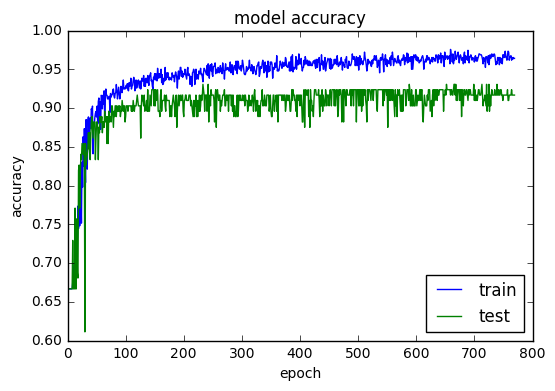

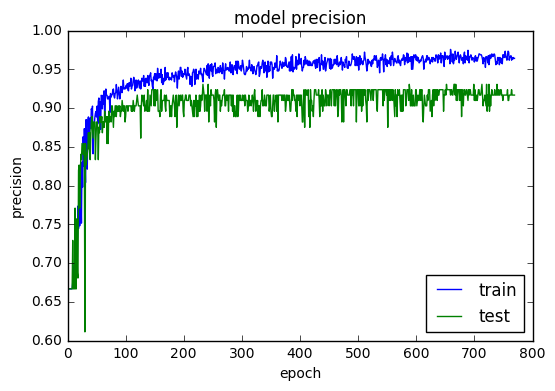

Continuation of training with no pre-processing:


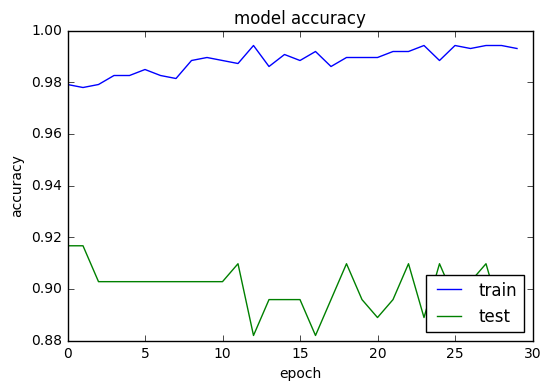

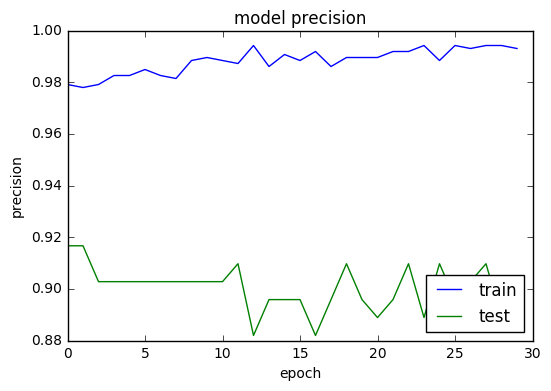

X shape: (144, 34, 56, 1)
144 samples
Evaluating ensemble
144/144 [==============================] - 5s     
Test accuracy: 91.6666666667 %
Test error: 8.33333333333 %
144/144 [==============================] - 4s     

Example of correct predictions for char: S_BASSA


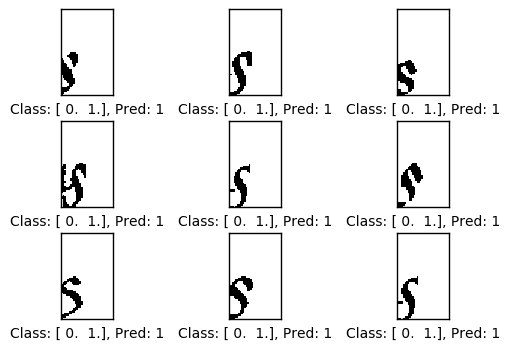


Example of incorrect predictions for char: S_BASSA


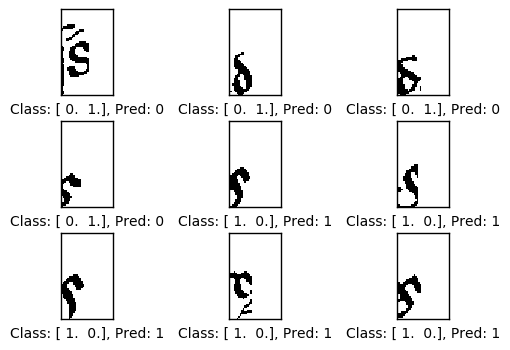

[[88  8]
 [ 4 44]]


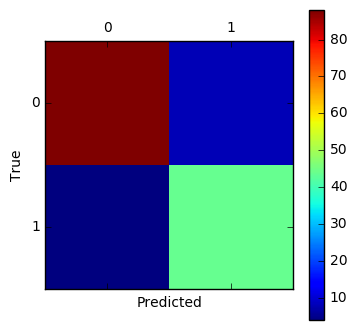


---- END ANALISYS FOR CHAR S_BASSA
 ----


In [5]:
analyze_all_letters(pos_neg_ratio=2)